In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('predictive_adr.csv')
data.head()

,ID,STATUS,REGION,ACC_AIR_CNT,ACC_CHET_UL_FLG,ACC_LAND_CNT,ACC_OBJ_CNT,ACC_TRANS_CNT,ACC_OTHER_TRANS_CNT,ACC_ALL_OBJ_PROPS_CNT,...,ID_VID_POST,LESS_YEAR,P_FIRST_STATUS,IDREG_BAD,ACTUAL_FOR_PROV,P_DTSTATUS,BLOCKED_SCHET_UL_FLG,BLOCKED_SCHET_UL_CNT,RUK_PROVIDE_2NDFL_FLG,DT_PROCESSING
0,6404075,5,24.0,0,0,0,0,0,0,0,...,11,0,100,0,0,19.12.2022 09:37,0,0,0,19.12.2022 22:30
1,6404010,6,14.0,0,0,0,0,0,0,0,...,11,0,100,0,0,19.12.2022 12:26,1,1,0,19.12.2022 22:30
2,6404011,5,25.0,0,0,0,0,0,0,0,...,4,0,100,150000275654821,0,14.02.2023 10:29,0,0,0,19.12.2022 22:30
3,6404014,5,65.0,0,1,0,0,23,0,23,...,11,0,100,0,0,19.12.2022 14:44,0,0,0,19.12.2022 22:30
4,6404088,5,24.0,0,1,0,0,0,0,0,...,11,1,100,0,0,16.01.2023 15:52,1,1,0,19.12.2022 22:30


In [84]:
data.shape

(97094, 54)

In [4]:
char = pd.read_excel('Показатели_для_проверки_к_выборке.xlsx')
char.head()

,описание,название
0,Признак наличия счетов у юл,ACC_CHET_UL_FLG
1,Количество открытых счетов у юл,OPEN_CHET_UL_CNT
2,Признак высокого налогового риска,HIGH_RISK_FLG
3,Признак участия ЮЛ в схемах ухода от налогообл...,UL_UKL_FLG
4,Количество текущих постановок на учет объектов...,ACC_OBJ_CNT\nACC_OBJ_CNT\nACC_LAND_CNT\nACC_TR...


In [5]:
all = list(char['название'])
all

['ACC_CHET_UL_FLG',
 'OPEN_CHET_UL_CNT',
 'HIGH_RISK_FLG',
 'UL_UKL_FLG',
 'ACC_OBJ_CNT\nACC_OBJ_CNT\nACC_LAND_CNT\nACC_TRANS_CNT\nACC_AIR_CNT\nACC_OTHER_TRANS_CNT\nACC_ALL_OBJ_PROPS_CNT',
 'RUK_ACC_OBJ_CNT\nRUK_ACC_OBJ_CNT\nRUK_ACC_LAND_CNT\nRUK_ACC_TRANS_CNT\nRUK_ACC_AIR_CNT\nRUK_ACC_OTHER_TRANS_CNT\nRUK_ACC_ALL_OBJ_PROPS_CNT',
 'UCH_ACC_OBJ_CNT\nUCH_ACC_LAND_CNT\nUCH_ACC_TRANS_CNT\nUCH_ACC_AIR_CNT\nUCH_ACC_OTHER_TRANS_CNT\nUCH_ACC_ALL_OBJ_PROPS_CNT',
 'RUK_RUK_REG_CHANGE_CNT',
 'RUK_UCHR_REG_CHANGE_CNT',
 'UCHR_RUK_REG_CHANGE_CNT',
 'UCHR_UCHR_REG_CHANGE_CNT',
 'REGION_INEQ_UL_RUK_FLG',
 'REGION_INEQ_UL_UCH_FLG',
 'NO_OTCHET_FLG',
 'BLOCKED_SCHET_UL_FLG\nBLOCKED_SCHET_UL_CNT',
 'SINGLE_RUK_UCH_FL_FLG\nSINGLE_RUK_UCH_UL_FLG',
 'RUK_PROVIDE_2NDFL_FLG']

In [6]:
res = []
for sub in range(len(all)):
    words = all[sub].split('\n')
    res.append(words)

In [7]:
all_splited = []
for a in range(len(res)):
    for b in range(len(res[a])):
        all_splited.append(res[a][b])

In [8]:
all_splited

['ACC_CHET_UL_FLG',
 'OPEN_CHET_UL_CNT',
 'HIGH_RISK_FLG',
 'UL_UKL_FLG',
 'ACC_OBJ_CNT',
 'ACC_OBJ_CNT',
 'ACC_LAND_CNT',
 'ACC_TRANS_CNT',
 'ACC_AIR_CNT',
 'ACC_OTHER_TRANS_CNT',
 'ACC_ALL_OBJ_PROPS_CNT',
 'RUK_ACC_OBJ_CNT',
 'RUK_ACC_OBJ_CNT',
 'RUK_ACC_LAND_CNT',
 'RUK_ACC_TRANS_CNT',
 'RUK_ACC_AIR_CNT',
 'RUK_ACC_OTHER_TRANS_CNT',
 'RUK_ACC_ALL_OBJ_PROPS_CNT',
 'UCH_ACC_OBJ_CNT',
 'UCH_ACC_LAND_CNT',
 'UCH_ACC_TRANS_CNT',
 'UCH_ACC_AIR_CNT',
 'UCH_ACC_OTHER_TRANS_CNT',
 'UCH_ACC_ALL_OBJ_PROPS_CNT',
 'RUK_RUK_REG_CHANGE_CNT',
 'RUK_UCHR_REG_CHANGE_CNT',
 'UCHR_RUK_REG_CHANGE_CNT',
 'UCHR_UCHR_REG_CHANGE_CNT',
 'REGION_INEQ_UL_RUK_FLG',
 'REGION_INEQ_UL_UCH_FLG',
 'NO_OTCHET_FLG',
 'BLOCKED_SCHET_UL_FLG',
 'BLOCKED_SCHET_UL_CNT',
 'SINGLE_RUK_UCH_FL_FLG',
 'SINGLE_RUK_UCH_UL_FLG',
 'RUK_PROVIDE_2NDFL_FLG']

In [121]:
data[all_splited].join(data['P_NED_ADR']).to_csv('data_not_processed.csv')

In [19]:
my_string = "hello\nworld\n"
new_string = ' '.join(my_string.split('\n'))
new_string

'hello world '

In [22]:
sentence = new_string
words = my_string.split('\n')

In [23]:
words

['hello', 'world', '']

# Анализ данных

В этом разделе проведем анализ данных с целью отсечения лишнего и оптимизации обучения:

<AxesSubplot:>

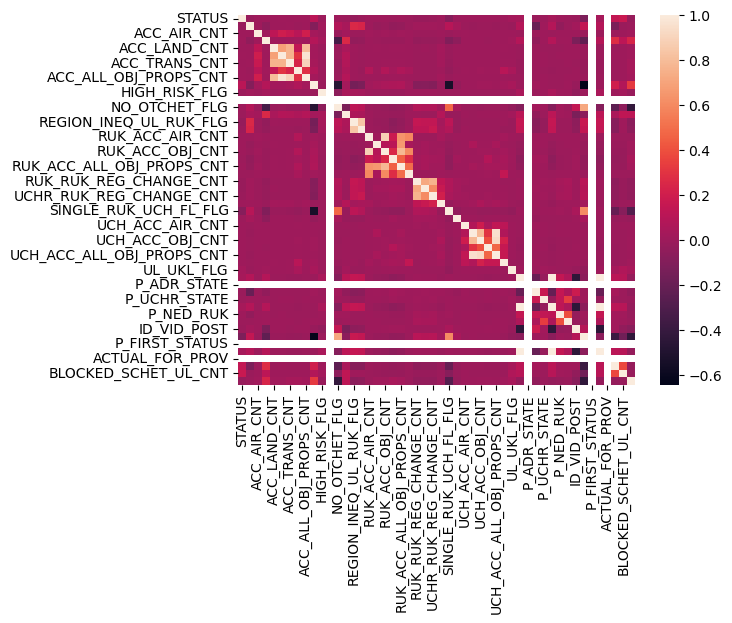

In [4]:
sns.heatmap(data.drop(['ID', 'DT_PROCESSING'], axis=1).corr())

Рассмотри признаки, корреляция между которыми больше 0.5:

In [105]:
def no_corr(df, corr_ratio):
    index = list(zip(list(np.where(df.corr() > corr_ratio)[0]), list(np.where(df.corr() > corr_ratio)[1])))
    non_diag = []
    
    for i in range(len(index)):
        if index[i][0] != index[i][1]:
            non_diag.append(index[i])   
    no2_diag = []
    
    for i in range(len(non_diag)):
        ii = set(non_diag[i])
        no2_diag.append(ii)
    
    korr_ind = sorted([t for t in (set(tuple(i) for i in no2_diag))]) #removeDuplicates(no2_diag))
    
    vc0 = pd.DataFrame(pd.DataFrame(korr_ind)[0].value_counts())# > 1
    vc1 = pd.DataFrame(pd.DataFrame(korr_ind)[1].value_counts())# > 1
    
    len0 = len(np.where(pd.DataFrame(korr_ind)[0].value_counts() > 1)[0])
    len1 = len(np.where(pd.DataFrame(korr_ind)[1].value_counts() > 1)[0])
    
    repeat_ind = sorted(list(vc0.iloc[0:len0].index) + list(vc1.iloc[0:len1].index))
    
    columns = list(df.columns[repeat_ind])
    
    return columns
    
    

In [52]:
no_corr(data.drop(['ID', 'DT_PROCESSING'], axis=1), 0.5)

['ACC_LAND_CNT',
 'ACC_OBJ_CNT',
 'ACC_TRANS_CNT',
 'ACC_ALL_OBJ_PROPS_CNT',
 'RUK_ACC_AIR_CNT',
 'RUK_ACC_OBJ_CNT',
 'RUK_ACC_ALL_OBJ_PROPS_CNT',
 'RUK_ACC_OTHER_TRANS_CNT',
 'RUK_UCHR_REG_CHANGE_CNT',
 'UCHR_RUK_REG_CHANGE_CNT',
 'UCH_ACC_OBJ_CNT',
 'UCH_ACC_ALL_OBJ_PROPS_CNT',
 'P_STATUS',
 'P_UCHR_STATE']

In [5]:
index = list(zip(list(np.where(data.drop(['ID', 'DT_PROCESSING'], axis=1).corr() > 0.5)[0]), list(np.where(data.drop(['ID', 'DT_PROCESSING'], axis=1).corr() > 0.5)[1])))

In [6]:
non_diag = []
for i in range(len(index)):
    if index[i][0] != index[i][1]:
        non_diag.append(index[i])

In [7]:
no2_diag = []
for i in range(len(non_diag)):
    ii = set(non_diag[i])
    no2_diag.append(ii)

In [8]:
def removeDuplicates(lst):     
    return [t for t in (set(tuple(i) for i in lst))]

Координаты (т.е. индексы столбцов) тех признаков, у которых значение матрицы корреляции больше 0.5:

In [9]:
korr_ind = sorted(removeDuplicates(no2_diag))
korr_ind

[(4, 5),
 (4, 6),
 (5, 6),
 (8, 4),
 (8, 5),
 (8, 6),
 (14, 15),
 (16, 18),
 (16, 20),
 (16, 21),
 (17, 20),
 (18, 20),
 (18, 21),
 (22, 23),
 (24, 22),
 (24, 23),
 (26, 43),
 (29, 30),
 (32, 29),
 (32, 30),
 (35, 39),
 (35, 45),
 (43, 12),
 (45, 39)]

Ищем индексы тех столбцов, которые встречались более одного раза в матрице корреляций со значением корреляции больше 0.5:

In [10]:
vc0 = pd.DataFrame(pd.DataFrame(korr_ind)[0].value_counts())# > 1
vc1 = pd.DataFrame(pd.DataFrame(korr_ind)[1].value_counts())# > 1

In [11]:
len0 = len(np.where(pd.DataFrame(korr_ind)[0].value_counts() > 1)[0])
len1 = len(np.where(pd.DataFrame(korr_ind)[1].value_counts() > 1)[0])

In [12]:
repeat_ind = sorted(list(vc0.iloc[0:len0].index) + list(vc1.iloc[0:len1].index))
repeat_ind

[4, 5, 6, 8, 16, 18, 20, 21, 23, 24, 30, 32, 35, 39]

In [13]:
data_to_delete = []
for d in range(len(repeat_ind)):
    dele = data[data.columns[repeat_ind[d]]]
    data_to_delete.append(dele)
    
pd_to_delete = pd.DataFrame(list(zip(*data_to_delete)), columns=data.columns[repeat_ind])

Фрейм данных, который можно выкинуть из модели ввиду выской скореллированности этих данных между собой:

In [14]:
pd_to_delete 

,ACC_CHET_UL_FLG,ACC_LAND_CNT,ACC_OBJ_CNT,ACC_OTHER_TRANS_CNT,REGION_INEQ_UL_UCH_FLG,RUK_ACC_LAND_CNT,RUK_ACC_TRANS_CNT,RUK_ACC_ALL_OBJ_PROPS_CNT,RUK_RUK_REG_CHANGE_CNT,RUK_UCHR_REG_CHANGE_CNT,UCH_ACC_LAND_CNT,UCH_ACC_TRANS_CNT,UL_UKL_FLG,P_RUK_STATE
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,7,0,0,1,0,0,1
2,0,0,0,0,0,1,0,2,0,0,1,0,0,0
3,1,0,0,0,0,0,42,44,0,0,0,76,0,1
4,1,0,0,0,0,0,2,2,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97089,1,0,0,0,0,0,0,1,0,0,0,0,0,1
97090,1,0,0,0,0,0,0,0,0,0,0,0,0,0
97091,1,0,0,0,0,0,0,0,0,0,0,0,0,0
97092,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Количество 0 и 1 в целевом столбце:

In [26]:
data['P_NED_ADR'].value_counts()

0    75851
1    21243
Name: P_NED_ADR, dtype: int64

<AxesSubplot:>

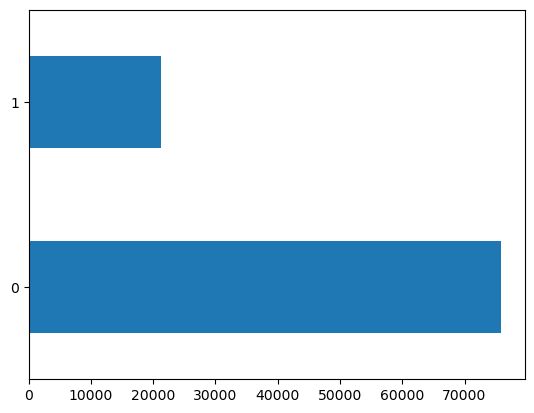

In [28]:
data['P_NED_ADR'].value_counts().plot(kind='barh')

Уникальные ID:

In [31]:
len(data['ID'].unique()), len(data['ID'])

(97094, 97094)

## Уникальные статусы

In [32]:
len(data['STATUS'].unique()), len(data['STATUS'])

(21, 97094)

In [34]:
data['STATUS'].value_counts()#.plot(kind='barh')

5      93356
6       1448
107      597
105      516
117      492
12       232
114       91
113       77
124       74
132       66
45        49
121       24
415       15
23        15
131       15
14         7
17         6
30         5
122        4
116        3
123        2
Name: STATUS, dtype: int64

In [68]:
STATUS_list = pd.DataFrame(data['STATUS'].value_counts())
STATUS_list

,STATUS
5,93356
6,1448
107,597
105,516
117,492
12,232
114,91
113,77
124,74
132,66


Сделаем разбивку датафрейма по статусам:

In [60]:
data_status_list = []
for s in range(len(STATUS_list)):
    data_status_s = data[data['STATUS'] == list(STATUS_list.index)[s]]
    data_status_list.append(data_status_s)

In [70]:
data_status_P_NED_list = []
for ss in range(STATUS_list.shape[0]):
    data_status_P_NED_ss = data_status_list[ss]['P_NED_ADR'].value_counts()
    data_status_P_NED_list.append(data_status_P_NED_ss)

In [77]:
lists_0_1 = []
for q in range(STATUS_list.shape[0]):
    lists_0_1_q = list(data_status_P_NED_list[q])
    lists_0_1.append(lists_0_1_q)


Фрейм данных по целевому признаку в зависимости от статуса:

In [82]:
df_status_0_1 = pd.DataFrame(lists_0_1, index=list(STATUS_list.index)).fillna(0)
df_status_0_1

,0,1
5,73082,20274.0
6,1166,282.0
107,329,268.0
105,312,204.0
117,418,74.0
12,220,12.0
114,67,24.0
113,58,19.0
124,65,9.0
132,60,6.0


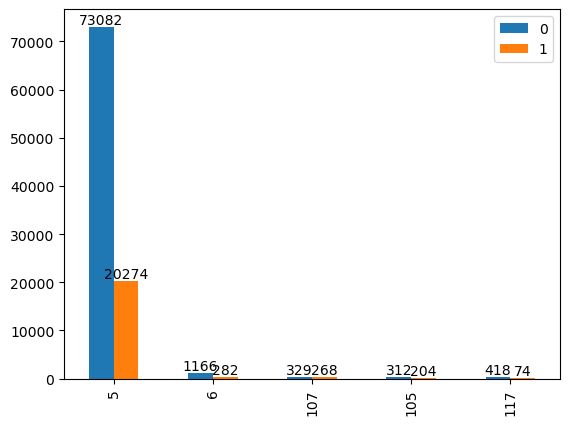

In [92]:
ax = df_status_0_1.iloc[0:5].plot.bar()

#annotate bars in bar plot
for container in ax.containers :
 ax.bar_label(container)

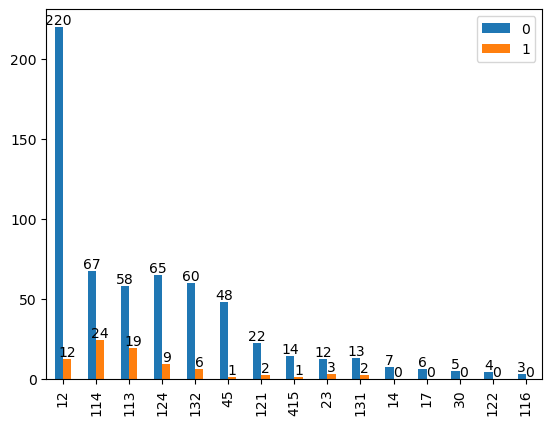

In [93]:
ax = df_status_0_1.iloc[5:-1].plot.bar()

#annotate bars in bar plot
for container in ax.containers :
 ax.bar_label(container)

## Регионы

In [94]:
len(data['REGION'].unique()), len(data['REGION'])

(87, 97094)

In [103]:
vc_REGION = data['REGION'].value_counts()#.plot(kind='barh')
vc_REGION

77.0    21377
50.0     9650
78.0     6146
66.0     3346
54.0     2885
        ...  
79.0       40
83.0       23
6.0        10
87.0        6
99.0        1
Name: REGION, Length: 86, dtype: int64

In [100]:
REGION_list = pd.DataFrame(data['REGION'].value_counts())
REGION_list

,REGION
77.0,21377
50.0,9650
78.0,6146
66.0,3346
54.0,2885
...,...
79.0,40
83.0,23
6.0,10
87.0,6


In [101]:
data_REGION_list = []
for s in range(len(REGION_list)):
    data_REGION_s = data[data['REGION'] == list(REGION_list.index)[s]]
    data_REGION_list.append(data_REGION_s)

In [107]:
data_REGION_P_NED_list = []
for ss in range(REGION_list.shape[0]):
    data_REGION_P_NED_ss = data_REGION_list[ss]['P_NED_ADR'].value_counts()
    data_REGION_P_NED_list.append(data_REGION_P_NED_ss)

In [109]:
lists_REGION_0_1 = []
for q in range(REGION_list.shape[0]):
    lists_REGION_0_1_q = list(data_REGION_P_NED_list[q])
    lists_REGION_0_1.append(lists_REGION_0_1_q)

In [110]:
df_REGION_0_1 = pd.DataFrame(lists_REGION_0_1, index=list(REGION_list.index)).fillna(0)
df_REGION_0_1

,0,1
77.0,15172,6205.0
50.0,8384,1266.0
78.0,3715,2431.0
66.0,2889,457.0
54.0,2549,336.0
...,...,...
79.0,39,1.0
83.0,20,3.0
6.0,7,3.0
87.0,5,1.0


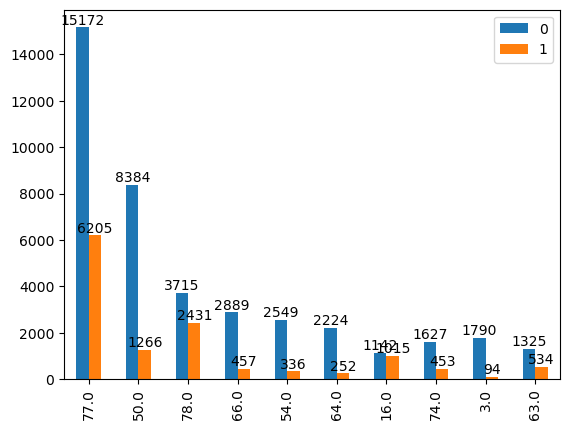

In [112]:
ax = df_REGION_0_1.iloc[0:10].plot.bar()

#annotate bars in bar plot
for container in ax.containers:
    ax.bar_label(container)

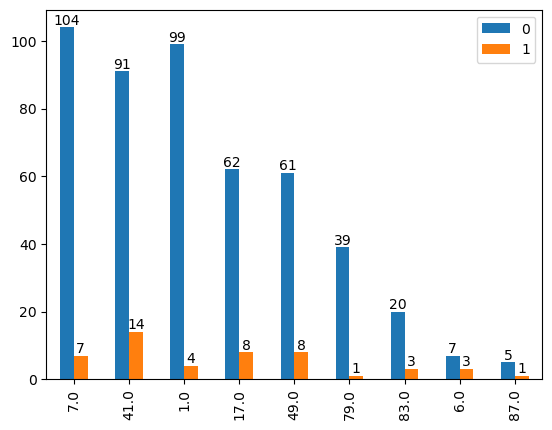

In [113]:
ax = df_REGION_0_1.iloc[-10:-1].plot.bar()

#annotate bars in bar plot
for container in ax.containers:
    ax.bar_label(container)

In [25]:
data['P_FIRST_STATUS'].value_counts()

100    97094
Name: P_FIRST_STATUS, dtype: int64

<AxesSubplot:>

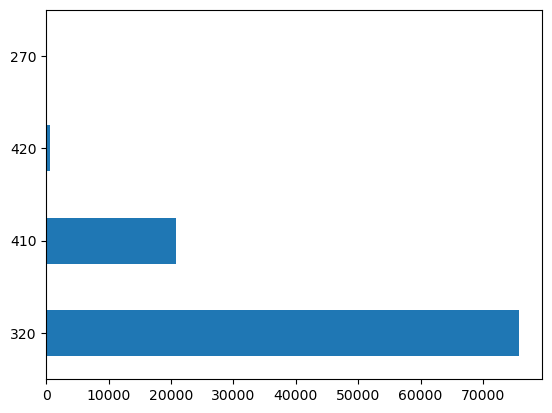

In [24]:
data['P_STATUS'].value_counts().plot(kind='barh')

<AxesSubplot:>

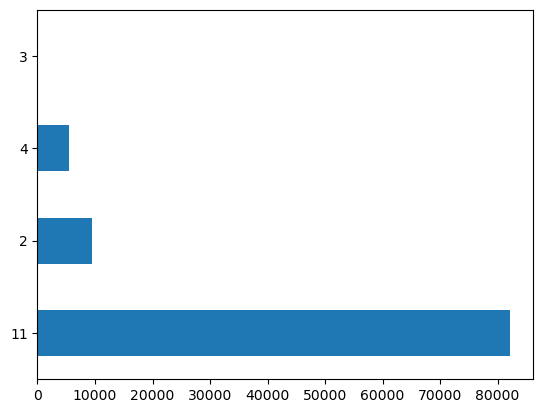

In [75]:
data['ID_VID_POST'].value_counts().plot(kind='barh')

## Препроцессинг; Разделение на обучающую и тестовую выборки; Обучение

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [14]:
X_droped, Y = data.drop(['ID', 'P_NED_ADR', 'DT_PROCESSING', 'P_DTSTATUS', 'P_DTZAP', 'P_FIRST_STATUS', 'IDREG_BAD']
                        + list(data.columns[repeat_ind]), axis=1), data['P_NED_ADR']

NameError: name 'repeat_ind' is not defined

In [16]:
X_droped, Y = data.drop(['ID', 'P_NED_ADR', 'DT_PROCESSING', 'P_DTSTATUS', 'P_DTZAP', 'P_FIRST_STATUS', 'IDREG_BAD'], axis=1), data['P_NED_ADR']

Колонки, в которых записаны только 0 или 1:

In [17]:
binary_cols = []
for xx in range(len(X_droped.columns)):
    if len(data[X_droped.columns[xx]].value_counts()) == 2:
        binary_cols.append(X_droped.columns[xx])
binary_cols

['ACC_CHET_UL_FLG',
 'HIGH_RISK_FLG',
 'NO_OTCHET_FLG',
 'REGION_INEQ_UL_RUK_FLG',
 'REGION_INEQ_UL_UCH_FLG',
 'SINGLE_RUK_UCH_FL_FLG',
 'SINGLE_RUK_UCH_UL_FLG',
 'UL_UKL_FLG',
 'P_RUK_STATE',
 'P_UCHR_STATE',
 'P_NED_RUK',
 'P_NED_UCHR',
 'LESS_YEAR',
 'BLOCKED_SCHET_UL_FLG',
 'RUK_PROVIDE_2NDFL_FLG']

Функция, которая из категориального столбца делает фрейм данных:

In [31]:
def column_to_ohe(data, column_name):
    onehotencoder_col = OneHotEncoder()
    data[column_name] = data[column_name].fillna(data[column_name].mode()[0])
    ohe_col = onehotencoder_col.fit_transform(data[[column_name]])
    col_cat_names = []
    for t in range(len(list(onehotencoder_col.categories_[0]))):
        col_t  = f'{column_name}_{int(list(onehotencoder_col.categories_[0])[t])}'
        col_cat_names.append(col_t)
    
    ohe_col_df = pd.DataFrame(ohe_col.toarray(), columns=col_cat_names).astype(int)
    
    return ohe_col_df 
    

Категориальные столбцы в X: 

In [19]:
categ_cols = ['STATUS', 'REGION', 'P_STATUS', 'ID_VID_POST']

In [20]:
categ_frame = []
for c in range(len(categ_cols)):
    categ_c = column_to_ohe(data, categ_cols[c])
    categ_frame.append(categ_c)

In [21]:
categ_frame[-1]

,ID_VID_POST_2,ID_VID_POST_3,ID_VID_POST_4,ID_VID_POST_11
0,0,0,0,1
1,0,0,0,1
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
97089,0,0,0,1
97090,0,0,0,1
97091,0,0,0,1
97092,0,0,0,1


Удалим все категориальные (в том числе и бинарные) колонки из фрейма данных:

In [22]:
X_new_droped = X_droped.drop(binary_cols+categ_cols, axis=1)

In [23]:
X_new_droped

,ACC_AIR_CNT,ACC_LAND_CNT,ACC_OBJ_CNT,ACC_TRANS_CNT,ACC_OTHER_TRANS_CNT,ACC_ALL_OBJ_PROPS_CNT,CREATE_DAYS_CNT,INTEGRATE_FLG,OPEN_CHET_UL_CNT,RUK_ACC_AIR_CNT,...,UCHR_UCHR_REG_CHANGE_CNT,UCH_ACC_AIR_CNT,UCH_ACC_LAND_CNT,UCH_ACC_OBJ_CNT,UCH_ACC_TRANS_CNT,UCH_ACC_ALL_OBJ_PROPS_CNT,UCH_ACC_OTHER_TRANS_CNT,P_ADR_STATE,ACTUAL_FOR_PROV,BLOCKED_SCHET_UL_CNT
0,0,0,0,0,0,0,1502,0,0,0,...,0,0,0,4,0,4,0,1,0,0
1,0,0,0,0,0,0,5626,0,0,0,...,0,0,1,6,0,7,0,1,0,1
2,0,0,0,0,0,0,2862,0,0,0,...,0,0,1,1,0,2,0,1,0,0
3,0,0,0,23,0,23,5136,0,1,0,...,0,0,0,4,76,80,0,1,0,0
4,0,0,0,0,0,0,97,0,1,0,...,0,0,0,0,2,2,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97089,0,0,0,0,0,0,477,0,2,0,...,0,0,0,1,0,1,0,1,0,4
97090,0,0,0,0,0,0,947,0,4,0,...,0,0,0,0,0,0,0,1,0,24
97091,0,0,0,0,0,0,861,0,4,0,...,0,0,0,0,0,0,0,1,0,20
97092,0,0,0,0,0,0,1196,0,2,0,...,0,0,0,0,0,0,0,1,0,8


Нормализуем оставшиеся колонки:

In [24]:
scaler = preprocessing.StandardScaler().fit(X_new_droped)
X_new_droped_scaled = pd.DataFrame(scaler.transform(X_new_droped), columns=X_new_droped.columns)

In [25]:
X_new_droped_scaled

,ACC_AIR_CNT,ACC_LAND_CNT,ACC_OBJ_CNT,ACC_TRANS_CNT,ACC_OTHER_TRANS_CNT,ACC_ALL_OBJ_PROPS_CNT,CREATE_DAYS_CNT,INTEGRATE_FLG,OPEN_CHET_UL_CNT,RUK_ACC_AIR_CNT,...,UCHR_UCHR_REG_CHANGE_CNT,UCH_ACC_AIR_CNT,UCH_ACC_LAND_CNT,UCH_ACC_OBJ_CNT,UCH_ACC_TRANS_CNT,UCH_ACC_ALL_OBJ_PROPS_CNT,UCH_ACC_OTHER_TRANS_CNT,P_ADR_STATE,ACTUAL_FOR_PROV,BLOCKED_SCHET_UL_CNT
0,-0.010627,-0.012663,-0.009204,-0.020444,-0.029048,-0.013974,-0.078583,0.0,-0.414379,-0.005891,...,-0.061626,-0.009601,-0.014468,-0.000800,-0.051174,-0.015947,-0.021838,0.0,0.0,-0.239165
1,-0.010627,-0.012663,-0.009204,-0.020444,-0.029048,-0.013974,1.729182,0.0,-0.414379,-0.005891,...,-0.061626,-0.009601,-0.009090,0.015068,-0.051174,-0.006377,-0.021838,0.0,0.0,-0.183791
2,-0.010627,-0.012663,-0.009204,-0.020444,-0.029048,-0.013974,0.517576,0.0,-0.414379,-0.005891,...,-0.061626,-0.009601,-0.009090,-0.024602,-0.051174,-0.022327,-0.021838,0.0,0.0,-0.239165
3,-0.010627,-0.012663,-0.009204,0.629871,-0.029048,0.184804,1.514389,0.0,-0.257817,-0.005891,...,-0.061626,-0.009601,-0.014468,-0.000800,1.735022,0.226485,-0.021838,0.0,0.0,-0.239165
4,-0.010627,-0.012663,-0.009204,-0.020444,-0.029048,-0.013974,-0.694468,0.0,-0.257817,-0.005891,...,-0.061626,-0.009601,-0.014468,-0.032536,-0.004169,-0.022327,-0.021838,0.0,0.0,-0.183791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97089,-0.010627,-0.012663,-0.009204,-0.020444,-0.029048,-0.013974,-0.527894,0.0,-0.101256,-0.005891,...,-0.061626,-0.009601,-0.014468,-0.024602,-0.051174,-0.025517,-0.021838,0.0,0.0,-0.017668
97090,-0.010627,-0.012663,-0.009204,-0.020444,-0.029048,-0.013974,-0.321869,0.0,0.211868,-0.005891,...,-0.061626,-0.009601,-0.014468,-0.032536,-0.051174,-0.028707,-0.021838,0.0,0.0,1.089816
97091,-0.010627,-0.012663,-0.009204,-0.020444,-0.029048,-0.013974,-0.359567,0.0,0.211868,-0.005891,...,-0.061626,-0.009601,-0.014468,-0.032536,-0.051174,-0.028707,-0.021838,0.0,0.0,0.868319
97092,-0.010627,-0.012663,-0.009204,-0.020444,-0.029048,-0.013974,-0.212719,0.0,-0.101256,-0.005891,...,-0.061626,-0.009601,-0.014468,-0.032536,-0.051174,-0.028707,-0.021838,0.0,0.0,0.203829


Теперь объединим все части:

In [26]:
X = X_new_droped_scaled.join(categ_frame).join(X_droped[binary_cols]).fillna(0)

In [30]:
X.to_csv('X_new.csv') 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [32]:
X_train

,ACC_AIR_CNT,ACC_TRANS_CNT,ACC_ALL_OBJ_PROPS_CNT,CREATE_DAYS_CNT,INTEGRATE_FLG,OPEN_CHET_UL_CNT,RUK_ACC_AIR_CNT,RUK_ACC_OBJ_CNT,RUK_ACC_OTHER_TRANS_CNT,UCHR_RUK_REG_CHANGE_CNT,...,NO_OTCHET_FLG,REGION_INEQ_UL_RUK_FLG,SINGLE_RUK_UCH_FL_FLG,SINGLE_RUK_UCH_UL_FLG,P_UCHR_STATE,P_NED_RUK,P_NED_UCHR,LESS_YEAR,BLOCKED_SCHET_UL_FLG,RUK_PROVIDE_2NDFL_FLG
7613,-0.010627,-0.020444,-0.013974,-0.471785,0.0,0.055306,-0.005891,-0.056579,-0.006552,-0.171769,...,0,0,0,0,0,0,0,0,0,1
49383,-0.010627,-0.020444,-0.013974,0.092812,0.0,0.211868,-0.005891,-0.056579,-0.006552,-0.171769,...,1,0,1,0,0,0,0,0,1,0
60847,-0.010627,-0.020444,-0.013974,-0.735235,0.0,-0.414379,-0.005891,-0.131845,-0.006552,-0.171769,...,1,0,1,0,0,0,0,1,0,0
49148,-0.010627,-0.020444,-0.013974,-0.735673,0.0,-0.414379,-0.005891,-0.131845,-0.006552,-0.171769,...,1,1,1,0,0,0,0,1,0,0
79202,-0.010627,-0.020444,-0.013974,-0.699290,0.0,-0.101256,-0.005891,0.018687,-0.006552,-0.171769,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,13.303530,0.007831,0.081093,1.652470,0.0,0.838116,-0.005891,-0.056579,-0.006552,-0.171769,...,0,0,0,0,0,0,0,0,0,1
45891,-0.010627,-0.020444,-0.013974,-0.724715,0.0,-0.257817,-0.005891,0.093952,-0.006552,-0.171769,...,1,0,0,0,0,0,0,1,0,0
42613,-0.010627,-0.020444,-0.013974,0.358016,0.0,-0.101256,-0.005891,-0.056579,-0.006552,1.789629,...,0,1,1,0,0,0,0,0,0,1
43567,-0.010627,-0.020444,-0.013974,1.153187,0.0,-0.101256,-0.005891,-0.056579,-0.006552,-0.171769,...,0,0,0,0,0,0,0,0,1,0


In [33]:
#pipe = make_pipeline(StandardScaler(), LogisticRegression())
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
#pipe.fit(X_train, y_train)

In [34]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [35]:
logreg.classes_

array([0, 1], dtype=int64)

In [48]:
list(logreg.coef_[0])

[0.043771157423835756,
 0.01746624628613658,
 -0.01807687890795793,
 0.007812011178090604,
 0.0,
 0.029821575895078743,
 -0.007832599893692366,
 -0.018455158173695977,
 -0.004071417935269255,
 0.030513583514538367,
 -0.2655498675635463,
 0.2778350749914356,
 -0.24499900033869415,
 0.1068267035732785,
 0.026793759985934095,
 0.0,
 0.0,
 0.047549063996807896,
 0.009150958260895436,
 0.27457822038861307,
 0.004226753742893809,
 -0.0012706769753259685,
 -0.000671094247532631,
 0.0007270960924764541,
 -0.00036695515897726226,
 0.005548530729742783,
 0.42276933079027257,
 -0.30314997307633706,
 0.008913993061563744,
 0.008316745459361773,
 -0.003828573320127238,
 -0.7831299845088882,
 -0.0019393388003116532,
 -0.00047205779779310855,
 0.01125090975817155,
 -0.00048293297830447854,
 0.0016803624185302195,
 0.013973526065419174,
 -0.001502541740812013,
 -0.5781495046953957,
 0.5173055976928952,
 0.037056900517861924,
 -0.008357056624551905,
 -1.1901457269767877,
 0.01485294530506139,
 -0.01155

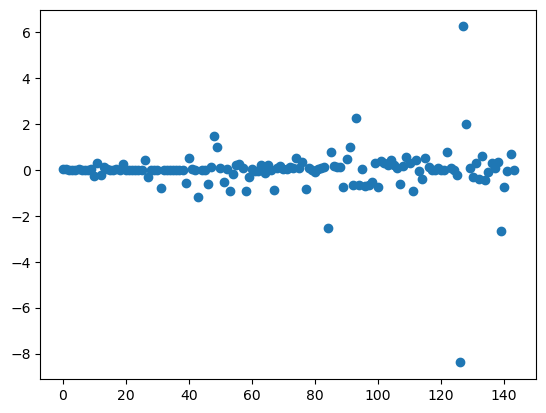

In [50]:
#logreg.intercept_

plt.scatter(range(len(list(logreg.coef_[0]))), list(logreg.coef_[0]))
plt.show()

In [ ]:
import matplotlib.pyplot as plt
logreg.coef_

In [37]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[9.99908619e-01, 9.13812861e-05],
       [8.12048002e-04, 9.99187952e-01],
       [3.22240699e-03, 9.96777593e-01],
       ...,
       [9.99878816e-01, 1.21183663e-04],
       [9.99863598e-01, 1.36401848e-04],
       [9.99828914e-01, 1.71085537e-04]])

In [38]:
y_pred =logreg.predict(X_test)
y_pred 

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [39]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [40]:
roc_auc_score(y_test, y_pred)

0.9995243883105216

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matri = confusion_matrix(y_test, y_pred)
print(confusion_matri)

[[18905    18]
 [    0  5351]]


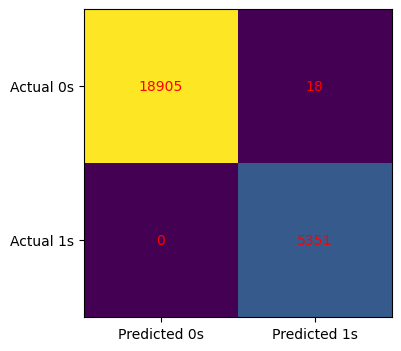

In [42]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18923
           1       1.00      1.00      1.00      5351

    accuracy                           1.00     24274
   macro avg       1.00      1.00      1.00     24274
weighted avg       1.00      1.00      1.00     24274



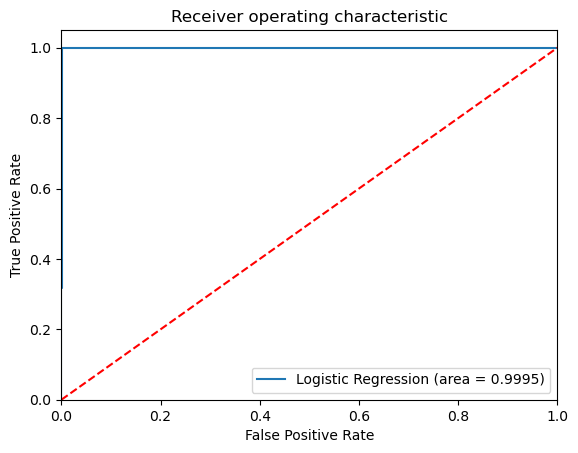

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Используем только столбцы из файла

In [86]:
X_new_droped, Y = data[all_splited], data['P_NED_ADR']

In [90]:
list(X_new_droped.columns)[4]

'ACC_OBJ_CNT'

<Axes: >

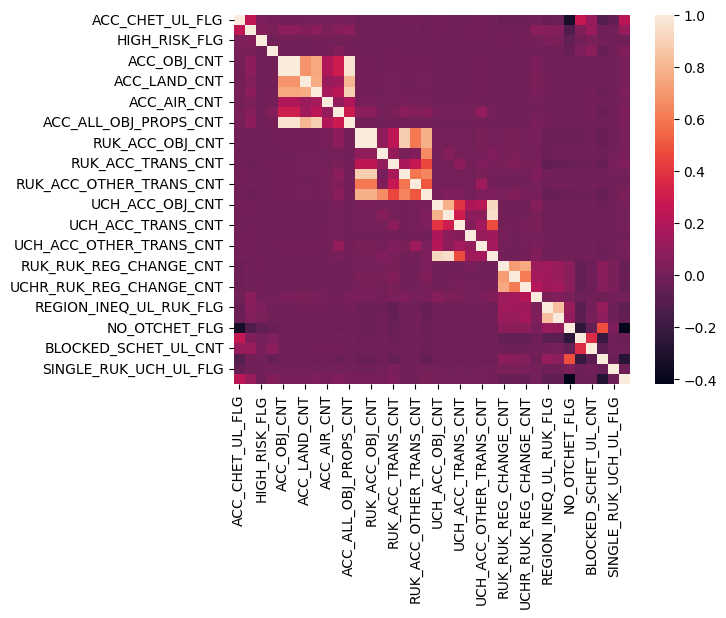

In [11]:
sns.heatmap(X_new_droped.corr())
#sns.heatmap(data.drop(['ID', 'DT_PROCESSING'], axis=1).corr())

Столбцы, которые очень сильно коррелируют между собой:

In [45]:
corr_gone = no_corr(X_new_droped, 0.8)
corr_gone 

['ACC_OBJ_CNT',
 'ACC_ALL_OBJ_PROPS_CNT',
 'RUK_ACC_OBJ_CNT',
 'RUK_ACC_AIR_CNT',
 'UCH_ACC_ALL_OBJ_PROPS_CNT']

In [46]:
X_no_corr_droped = X_new_droped.drop(corr_gone, axis=1)

In [47]:
X_no_corr_droped

,ACC_CHET_UL_FLG,OPEN_CHET_UL_CNT,HIGH_RISK_FLG,UL_UKL_FLG,ACC_LAND_CNT,ACC_TRANS_CNT,ACC_AIR_CNT,ACC_OTHER_TRANS_CNT,RUK_ACC_LAND_CNT,RUK_ACC_TRANS_CNT,...,UCHR_RUK_REG_CHANGE_CNT,UCHR_UCHR_REG_CHANGE_CNT,REGION_INEQ_UL_RUK_FLG,REGION_INEQ_UL_UCH_FLG,NO_OTCHET_FLG,BLOCKED_SCHET_UL_FLG,BLOCKED_SCHET_UL_CNT,SINGLE_RUK_UCH_FL_FLG,SINGLE_RUK_UCH_UL_FLG,RUK_PROVIDE_2NDFL_FLG
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,23,0,0,0,42,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,2,...,0,0,0,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97089,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4,0,0,0
97090,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,24,0,0,0
97091,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,20,0,0,0
97092,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,8,0,0,0


In [76]:
len(data[data.columns[5]].value_counts())

87

In [101]:
def binar_cols(df):
    binary_cols = []
    for xx in range(len(df.columns)):
        if len(data[df.columns[xx]].value_counts()) == 2:
            binary_cols.append(df.columns[xx])
    return binary_cols

In [102]:
binars = binar_cols(X_new_droped)
binars

['ACC_CHET_UL_FLG',
 'HIGH_RISK_FLG',
 'UL_UKL_FLG',
 'REGION_INEQ_UL_RUK_FLG',
 'REGION_INEQ_UL_UCH_FLG',
 'NO_OTCHET_FLG',
 'BLOCKED_SCHET_UL_FLG',
 'SINGLE_RUK_UCH_FL_FLG',
 'SINGLE_RUK_UCH_UL_FLG',
 'RUK_PROVIDE_2NDFL_FLG']

In [99]:
def categ_cols(df):
    categ_cols = []
    for xx in range(len(df.columns)):
        if (len(data[df.columns[xx]].value_counts()) > 2) & (len(data[df.columns[xx]].value_counts()) < 20):
            categ_cols.append(df.columns[xx])
    return categ_cols

In [100]:
categs = categ_cols(X_new_droped)
categs

['RUK_ACC_AIR_CNT',
 'RUK_ACC_OTHER_TRANS_CNT',
 'RUK_RUK_REG_CHANGE_CNT',
 'UCHR_RUK_REG_CHANGE_CNT']

In [22]:
no_categs = list(X_new_droped.drop(binars+categs, axis=1).columns)
no_categs

['OPEN_CHET_UL_CNT',
 'ACC_OBJ_CNT',
 'ACC_OBJ_CNT',
 'ACC_LAND_CNT',
 'ACC_TRANS_CNT',
 'ACC_AIR_CNT',
 'ACC_OTHER_TRANS_CNT',
 'ACC_ALL_OBJ_PROPS_CNT',
 'RUK_ACC_OBJ_CNT',
 'RUK_ACC_OBJ_CNT',
 'RUK_ACC_LAND_CNT',
 'RUK_ACC_TRANS_CNT',
 'RUK_ACC_ALL_OBJ_PROPS_CNT',
 'UCH_ACC_OBJ_CNT',
 'UCH_ACC_LAND_CNT',
 'UCH_ACC_TRANS_CNT',
 'UCH_ACC_AIR_CNT',
 'UCH_ACC_OTHER_TRANS_CNT',
 'UCH_ACC_ALL_OBJ_PROPS_CNT',
 'RUK_UCHR_REG_CHANGE_CNT',
 'UCHR_UCHR_REG_CHANGE_CNT',
 'BLOCKED_SCHET_UL_CNT']

In [24]:
X_new_droped.drop(binars+categs, axis=1)

,OPEN_CHET_UL_CNT,ACC_OBJ_CNT,ACC_OBJ_CNT,ACC_LAND_CNT,ACC_TRANS_CNT,ACC_AIR_CNT,ACC_OTHER_TRANS_CNT,ACC_ALL_OBJ_PROPS_CNT,RUK_ACC_OBJ_CNT,RUK_ACC_OBJ_CNT,...,RUK_ACC_ALL_OBJ_PROPS_CNT,UCH_ACC_OBJ_CNT,UCH_ACC_LAND_CNT,UCH_ACC_TRANS_CNT,UCH_ACC_AIR_CNT,UCH_ACC_OTHER_TRANS_CNT,UCH_ACC_ALL_OBJ_PROPS_CNT,RUK_UCHR_REG_CHANGE_CNT,UCHR_UCHR_REG_CHANGE_CNT,BLOCKED_SCHET_UL_CNT
0,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,4,0,0,0
1,0,0,0,0,0,0,0,0,6,6,...,7,6,1,0,0,0,7,0,0,1
2,0,0,0,0,0,0,0,0,1,1,...,2,1,1,0,0,0,2,0,0,0
3,1,0,0,0,23,0,0,23,2,2,...,44,4,0,76,0,0,80,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,2,0,0,2,0,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97089,2,0,0,0,0,0,0,0,1,1,...,1,1,0,0,0,0,1,0,0,4
97090,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,24
97091,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
97092,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [27]:
from sklearn import preprocessing

In [29]:
scaler = preprocessing.StandardScaler().fit(X_new_droped.drop(binars+categs, axis=1))
X_no_categs_scaled = pd.DataFrame(scaler.transform(X_new_droped.drop(binars+categs, axis=1)), columns=no_categs)
X_no_categs_scaled

,OPEN_CHET_UL_CNT,ACC_OBJ_CNT,ACC_OBJ_CNT,ACC_LAND_CNT,ACC_TRANS_CNT,ACC_AIR_CNT,ACC_OTHER_TRANS_CNT,ACC_ALL_OBJ_PROPS_CNT,RUK_ACC_OBJ_CNT,RUK_ACC_OBJ_CNT,...,RUK_ACC_ALL_OBJ_PROPS_CNT,UCH_ACC_OBJ_CNT,UCH_ACC_LAND_CNT,UCH_ACC_TRANS_CNT,UCH_ACC_AIR_CNT,UCH_ACC_OTHER_TRANS_CNT,UCH_ACC_ALL_OBJ_PROPS_CNT,RUK_UCHR_REG_CHANGE_CNT,UCHR_UCHR_REG_CHANGE_CNT,BLOCKED_SCHET_UL_CNT
0,-0.414379,-0.009204,-0.009204,-0.012663,-0.020444,-0.010627,-0.029048,-0.013974,-0.131845,-0.131845,...,-0.201529,-0.000800,-0.014468,-0.051174,-0.009601,-0.021838,-0.015947,-0.154565,-0.061626,-0.239165
1,-0.414379,-0.009204,-0.009204,-0.012663,-0.020444,-0.010627,-0.029048,-0.013974,0.319749,0.319749,...,0.147310,0.015068,-0.009090,-0.051174,-0.009601,-0.021838,-0.006377,-0.154565,-0.061626,-0.183791
2,-0.414379,-0.009204,-0.009204,-0.012663,-0.020444,-0.010627,-0.029048,-0.013974,-0.056579,-0.056579,...,-0.101861,-0.024602,-0.009090,-0.051174,-0.009601,-0.021838,-0.022327,-0.154565,-0.061626,-0.239165
3,-0.257817,-0.009204,-0.009204,-0.012663,0.629871,-0.010627,-0.029048,0.184804,0.018687,0.018687,...,1.991176,-0.000800,-0.014468,1.735022,-0.009601,-0.021838,0.226485,-0.154565,-0.061626,-0.239165
4,-0.257817,-0.009204,-0.009204,-0.012663,-0.020444,-0.010627,-0.029048,-0.013974,-0.131845,-0.131845,...,-0.101861,-0.032536,-0.014468,-0.004169,-0.009601,-0.021838,-0.022327,-0.154565,-0.061626,-0.183791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97089,-0.101256,-0.009204,-0.009204,-0.012663,-0.020444,-0.010627,-0.029048,-0.013974,-0.056579,-0.056579,...,-0.151695,-0.024602,-0.014468,-0.051174,-0.009601,-0.021838,-0.025517,-0.154565,-0.061626,-0.017668
97090,0.211868,-0.009204,-0.009204,-0.012663,-0.020444,-0.010627,-0.029048,-0.013974,-0.131845,-0.131845,...,-0.201529,-0.032536,-0.014468,-0.051174,-0.009601,-0.021838,-0.028707,-0.154565,-0.061626,1.089816
97091,0.211868,-0.009204,-0.009204,-0.012663,-0.020444,-0.010627,-0.029048,-0.013974,-0.131845,-0.131845,...,-0.201529,-0.032536,-0.014468,-0.051174,-0.009601,-0.021838,-0.028707,-0.154565,-0.061626,0.868319
97092,-0.101256,-0.009204,-0.009204,-0.012663,-0.020444,-0.010627,-0.029048,-0.013974,-0.131845,-0.131845,...,-0.201529,-0.032536,-0.014468,-0.051174,-0.009601,-0.021838,-0.028707,-0.154565,-0.061626,0.203829


In [35]:
categ_frame = []
for c in range(len(categs)):
    categ_c = column_to_ohe(X_new_droped[categs], categs[c])
    categ_frame.append(categ_c)

C:\Users\ivan\AppData\Local\Temp\ipykernel_9012\3562367698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].fillna(data[column_name].mode()[0])
C:\Users\ivan\AppData\Local\Temp\ipykernel_9012\3562367698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column_name] = data[column_name].fillna(data[column_name].mode()[0])
C:\Users\ivan\AppData\Local\Temp\ipykernel_9012\3562367698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [54]:
for j in range(len(categ_frame)):
    print(categ_frame[j].shape[1])

6
6
19
19


In [103]:
X_all = X_no_categs_scaled.join(X_new_droped[binars]).join(categ_frame[0]).join(categ_frame[1]).join(categ_frame[2]).join(categ_frame[3])
X_all

,OPEN_CHET_UL_CNT,ACC_OBJ_CNT,ACC_OBJ_CNT,ACC_LAND_CNT,ACC_TRANS_CNT,ACC_AIR_CNT,ACC_OTHER_TRANS_CNT,ACC_ALL_OBJ_PROPS_CNT,RUK_ACC_OBJ_CNT,RUK_ACC_OBJ_CNT,...,UCHR_RUK_REG_CHANGE_CNT_9,UCHR_RUK_REG_CHANGE_CNT_10,UCHR_RUK_REG_CHANGE_CNT_11,UCHR_RUK_REG_CHANGE_CNT_12,UCHR_RUK_REG_CHANGE_CNT_13,UCHR_RUK_REG_CHANGE_CNT_15,UCHR_RUK_REG_CHANGE_CNT_16,UCHR_RUK_REG_CHANGE_CNT_17,UCHR_RUK_REG_CHANGE_CNT_20,UCHR_RUK_REG_CHANGE_CNT_32
0,-0.414379,-0.009204,-0.009204,-0.012663,-0.020444,-0.010627,-0.029048,-0.013974,-0.131845,-0.131845,...,0,0,0,0,0,0,0,0,0,0
1,-0.414379,-0.009204,-0.009204,-0.012663,-0.020444,-0.010627,-0.029048,-0.013974,0.319749,0.319749,...,0,0,0,0,0,0,0,0,0,0
2,-0.414379,-0.009204,-0.009204,-0.012663,-0.020444,-0.010627,-0.029048,-0.013974,-0.056579,-0.056579,...,0,0,0,0,0,0,0,0,0,0
3,-0.257817,-0.009204,-0.009204,-0.012663,0.629871,-0.010627,-0.029048,0.184804,0.018687,0.018687,...,0,0,0,0,0,0,0,0,0,0
4,-0.257817,-0.009204,-0.009204,-0.012663,-0.020444,-0.010627,-0.029048,-0.013974,-0.131845,-0.131845,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97089,-0.101256,-0.009204,-0.009204,-0.012663,-0.020444,-0.010627,-0.029048,-0.013974,-0.056579,-0.056579,...,0,0,0,0,0,0,0,0,0,0
97090,0.211868,-0.009204,-0.009204,-0.012663,-0.020444,-0.010627,-0.029048,-0.013974,-0.131845,-0.131845,...,0,0,0,0,0,0,0,0,0,0
97091,0.211868,-0.009204,-0.009204,-0.012663,-0.020444,-0.010627,-0.029048,-0.013974,-0.131845,-0.131845,...,0,0,0,0,0,0,0,0,0,0
97092,-0.101256,-0.009204,-0.009204,-0.012663,-0.020444,-0.010627,-0.029048,-0.013974,-0.131845,-0.131845,...,0,0,0,0,0,0,0,0,0,0


In [105]:
X_all.join(Y).to_csv('data_processed.csv')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2, random_state=0)

In [29]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [30]:
model.score(X_test, y_test)

0.7845409135382873

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[14875,   246],
       [ 3938,   360]], dtype=int64)

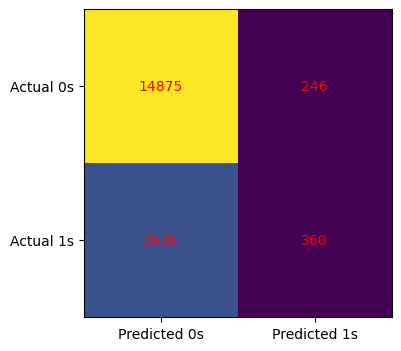

In [32]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [34]:
X_new.join(Y)

,OPEN_CHET_UL_CNT,ACC_LAND_CNT,ACC_TRANS_CNT,ACC_AIR_CNT,ACC_OTHER_TRANS_CNT,RUK_ACC_LAND_CNT,RUK_ACC_TRANS_CNT,RUK_ACC_ALL_OBJ_PROPS_CNT,UCH_ACC_OBJ_CNT,UCH_ACC_LAND_CNT,...,HIGH_RISK_FLG,UL_UKL_FLG,REGION_INEQ_UL_RUK_FLG,REGION_INEQ_UL_UCH_FLG,NO_OTCHET_FLG,BLOCKED_SCHET_UL_FLG,SINGLE_RUK_UCH_FL_FLG,SINGLE_RUK_UCH_UL_FLG,RUK_PROVIDE_2NDFL_FLG,P_NED_ADR
0,-0.414379,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,-0.273827,-0.201529,-0.000800,-0.014468,...,0,0,0,0,0,0,0,0,0,0
1,-0.414379,-0.012663,-0.020444,-0.010627,-0.029048,-0.005387,-0.273827,0.147310,0.015068,-0.009090,...,0,0,0,0,0,1,0,0,0,0
2,-0.414379,-0.012663,-0.020444,-0.010627,-0.029048,-0.005387,-0.273827,-0.101861,-0.024602,-0.009090,...,0,0,0,0,0,0,0,0,0,1
3,-0.257817,-0.012663,0.629871,-0.010627,-0.029048,-0.092960,9.086374,1.991176,-0.000800,-0.014468,...,0,0,0,0,0,0,0,0,0,0
4,-0.257817,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,0.171897,-0.101861,-0.032536,-0.014468,...,0,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97089,-0.101256,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,-0.273827,-0.151695,-0.024602,-0.014468,...,0,0,0,0,0,1,0,0,0,0
97090,0.211868,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,-0.273827,-0.201529,-0.032536,-0.014468,...,0,0,0,0,1,1,0,0,0,0
97091,0.211868,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,-0.273827,-0.201529,-0.032536,-0.014468,...,0,0,0,0,1,1,0,0,0,0
97092,-0.101256,-0.012663,-0.020444,-0.010627,-0.029048,-0.092960,-0.273827,-0.201529,-0.032536,-0.014468,...,0,0,0,0,1,1,0,0,0,0


# Logistic Regression

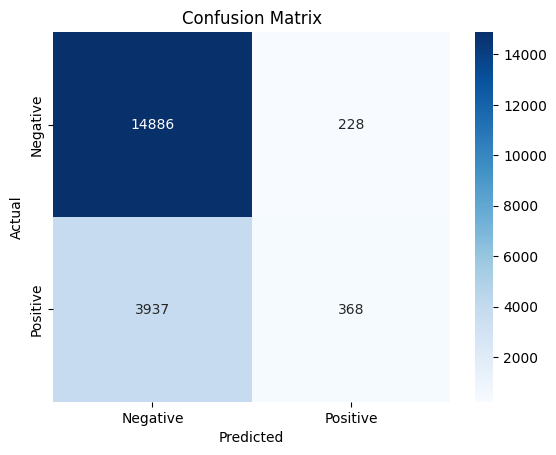

True Positives (TP): 368
True Negatives (TN): 14886
              precision    recall  f1-score   support

           0       0.79      0.98      0.88     15114
           1       0.62      0.09      0.15      4305

    accuracy                           0.79     19419
   macro avg       0.70      0.54      0.51     19419
weighted avg       0.75      0.79      0.72     19419

CPU times: total: 2.92 s
Wall time: 2.96 s


In [140]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv') 
dataset = dataset.drop('Unnamed: 0', axis=1)

X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a random forest classifier
classifier =LogisticRegression(solver='liblinear', C=10.0, random_state=0)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))

# Random Forest

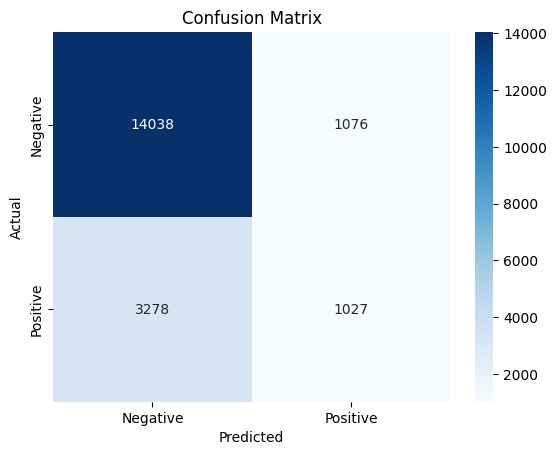

True Positives (TP): 1027
True Negatives (TN): 14038
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     15114
           1       0.49      0.24      0.32      4305

    accuracy                           0.78     19419
   macro avg       0.65      0.58      0.59     19419
weighted avg       0.74      0.78      0.74     19419

CPU times: total: 13 s
Wall time: 13.1 s


In [104]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv') 
dataset = dataset.drop('Unnamed: 0', axis=1)

X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a random forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))

# Adjust the classification threshold

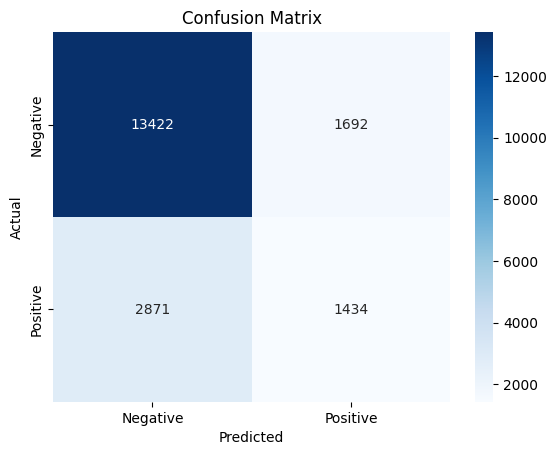

True Positives (TP): 1434
True Negatives (TN): 13422
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     15114
           1       0.46      0.33      0.39      4305

    accuracy                           0.77     19419
   macro avg       0.64      0.61      0.62     19419
weighted avg       0.74      0.77      0.75     19419

CPU times: total: 12.3 s
Wall time: 12.3 s


In [103]:
%%time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')  # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset
# Encode categorical features
label_encoder = LabelEncoder()
for column in dataset.columns:
    if dataset[column].dtype == 'object':
        dataset[column] = label_encoder.fit_transform(dataset[column].astype(str))

# Split the dataset into features (X) and target (y)
X = dataset.drop('P_NED_ADR', axis=1)
y = dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set with probabilities
y_pred_prob = classifier.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Adjust the threshold to balance TP and FP
threshold = 0.4  # Adjust this threshold as needed
y_pred = (y_pred_prob >= threshold).astype(int)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))


# Oversampling or undersampling

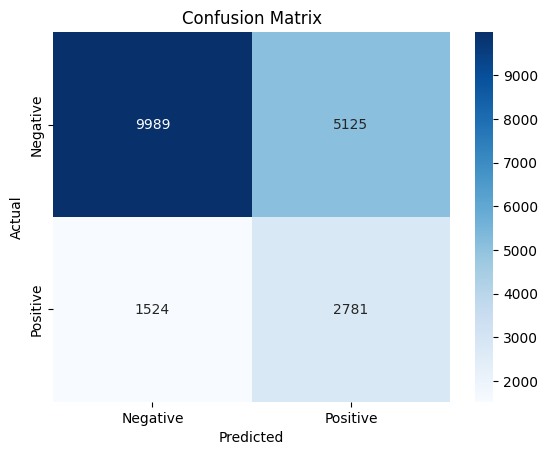

True Positives (TP): 2781
True Negatives (TN): 9989
              precision    recall  f1-score   support

           0       0.87      0.66      0.75     15114
           1       0.35      0.65      0.46      4305

    accuracy                           0.66     19419
   macro avg       0.61      0.65      0.60     19419
weighted avg       0.75      0.66      0.68     19419

CPU times: total: 6.45 s
Wall time: 6.49 s


In [102]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')  # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X = dataset.drop('P_NED_ADR', axis=1)
y = dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply oversampling to the training data
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Apply undersampling to the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Train a random forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))


# Feature engineering

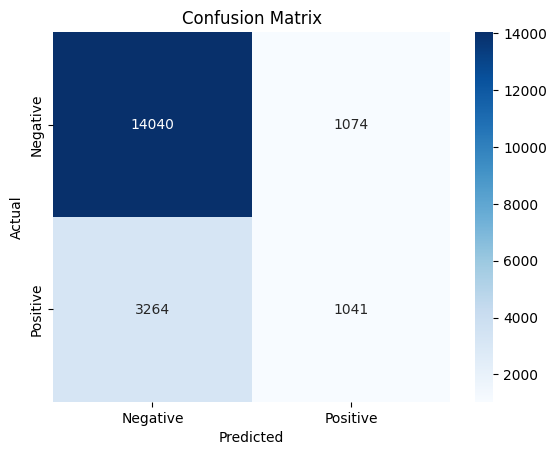

True Positives (TP): 1041
True Negatives (TN): 14040
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     15114
           1       0.49      0.24      0.32      4305

    accuracy                           0.78     19419
   macro avg       0.65      0.59      0.60     19419
weighted avg       0.74      0.78      0.75     19419

CPU times: total: 14.5 s
Wall time: 14.5 s


In [101]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_processed.csv') 
dataset = dataset.drop('Unnamed: 0', axis=1)

X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a random forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_mat.ravel()

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))

# Algorithm selection

Выбор алгоритма играет решающую роль в максимизации показателей TP и TN. Различные алгоритмы имеют разные сильные и слабые стороны, и некоторые алгоритмы могут работать лучше, чем другие, в зависимости от характеристик набора данных. Вот пример кода, демонстрирующий выбор алгоритма для бинарной классификации:

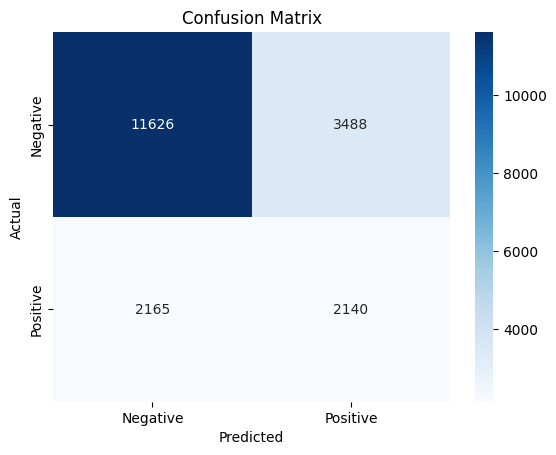

True Positives (TP): 2140
True Negatives (TN): 11626
              precision    recall  f1-score   support

           0       0.87      0.66      0.75     15114
           1       0.35      0.65      0.46      4305

    accuracy                           0.66     19419
   macro avg       0.61      0.66      0.61     19419
weighted avg       0.76      0.66      0.69     19419

CPU times: total: 24min 50s
Wall time: 24min 59s


In [99]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the list of classifiers to evaluate
classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC()
]

# Initialize variables to track the best classifier and its performance
best_classifier = None
best_tp, best_tn = 0, 0
best_confusion_mat = None

# Iterate over the classifiers and evaluate their performance
for classifier in classifiers:
    # Apply oversampling to the training data
    oversampler = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

    # Apply undersampling to the training data
    undersampler = RandomUnderSampler(random_state=42)
    X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)
    
    # Train the classifier
    classifier.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the model
    confusion_mat = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_mat.ravel()

    # Check if the current classifier has better TP and TN metrics
    if tp + tn > best_tp + best_tn:
        best_classifier = classifier
        best_tp = tp
        best_tn = tn
        best_confusion_mat = confusion_mat

# Visualize the best confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(best_confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = best_confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))


# Cost-sensitive learning

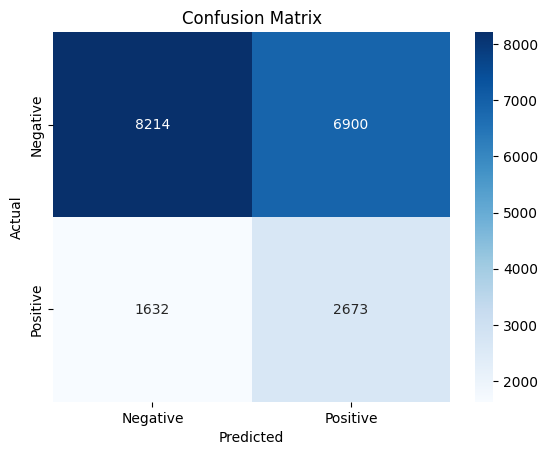

True Positives (TP): 2673
True Negatives (TN): 8214
              precision    recall  f1-score   support

           0       0.83      0.54      0.66     15114
           1       0.28      0.62      0.39      4305

    accuracy                           0.56     19419
   macro avg       0.56      0.58      0.52     19419
weighted avg       0.71      0.56      0.60     19419

CPU times: total: 19.6 s
Wall time: 19.8 s


In [98]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply oversampling to the training data
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Apply undersampling to the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)

# Define the misclassification costs
class_weights = {
    0: 1,  # Cost for the negative class
    1: 10  # Cost for the positive class
}

# Train the classifier with cost-sensitive learning
classifier = RandomForestClassifier(class_weight=class_weights)
classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))


# Ensemble methods

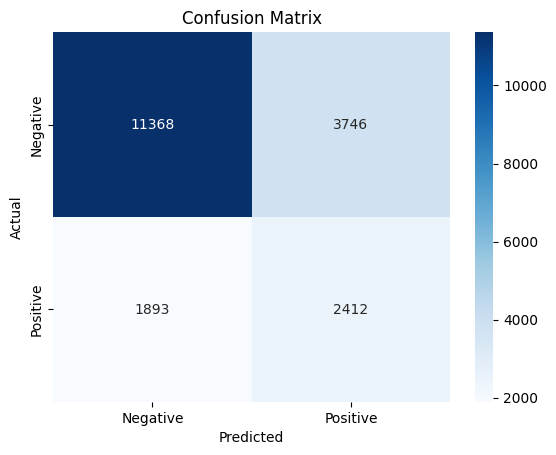

True Positives (TP): 2412
True Negatives (TN): 11368
              precision    recall  f1-score   support

           0       0.86      0.75      0.80     15114
           1       0.39      0.56      0.46      4305

    accuracy                           0.71     19419
   macro avg       0.62      0.66      0.63     19419
weighted avg       0.75      0.71      0.73     19419

CPU times: total: 31.4 s
Wall time: 31.5 s


In [97]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply oversampling to the training data
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Apply undersampling to the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)

# Define the individual base models
model1 = RandomForestClassifier()
model2 = GradientBoostingClassifier()

# Create an ensemble using VotingClassifier
ensemble = VotingClassifier(
    estimators=[('rf', model1), ('gb', model2)],
    voting='soft'  # Use soft voting for probability-based predictions
)

# Train the ensemble model
ensemble.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = ensemble.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))


# Threshold tuning

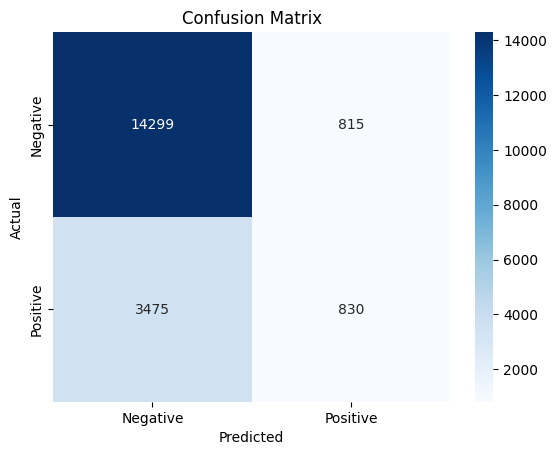

Best Threshold: 0.8
True Positives (TP): 830
True Negatives (TN): 14299
              precision    recall  f1-score   support

           0       0.80      0.95      0.87     15114
           1       0.50      0.19      0.28      4305

    accuracy                           0.78     19419
   macro avg       0.65      0.57      0.57     19419
weighted avg       0.74      0.78      0.74     19419



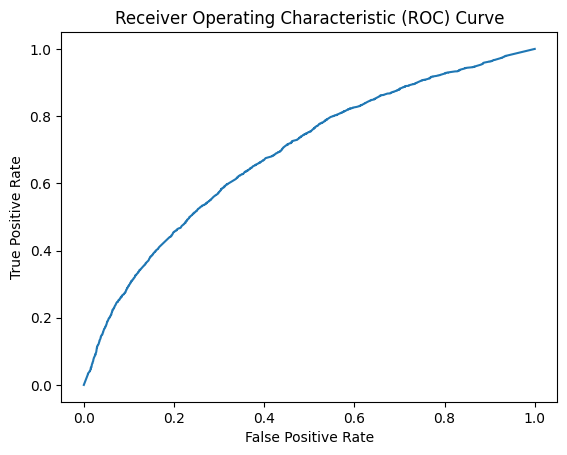

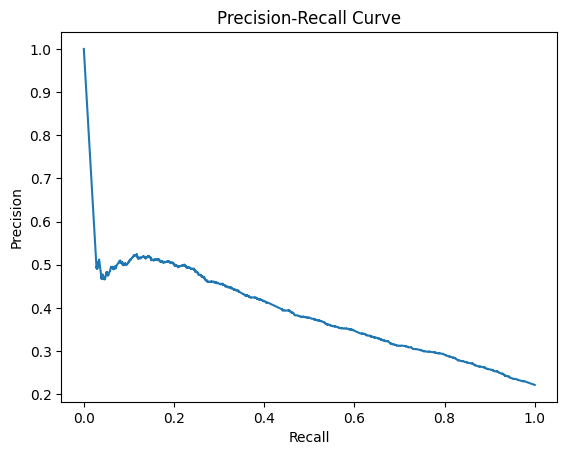

CPU times: total: 17.8 s
Wall time: 17.9 s


In [96]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply oversampling to the training data
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Apply undersampling to the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)

# Train the classifier
classifier = RandomForestClassifier()
classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set with probabilities
y_pred_prob = classifier.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Evaluate the model using different thresholds
thresholds = np.arange(0.1, 1.0, 0.1)
best_threshold = 0
best_tp, best_tn = 0, 0
best_confusion_mat = None

for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)
    confusion_mat = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_mat.ravel()

    if tp + tn > best_tp + best_tn:
        best_tp = tp
        best_tn = tn
        best_confusion_mat = confusion_mat
        best_threshold = threshold

# Visualize the best confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(best_confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the best threshold, True Positive (TP), and True Negative (TN) metrics
print("Best Threshold:", best_threshold)
print("True Positives (TP):", best_tp)
print("True Negatives (TN):", best_tn)

# Print the classification report
y_pred_best = (y_pred_prob >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_best))

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

# Plot the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# Cost-sensitive learning with custom weights

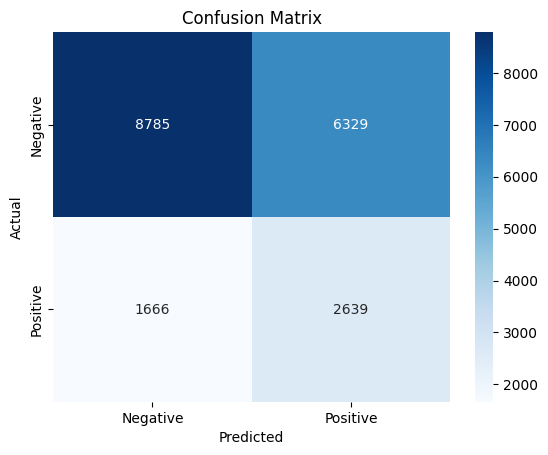

True Positives (TP): 2639
True Negatives (TN): 8785
              precision    recall  f1-score   support

           0       0.84      0.58      0.69     15114
           1       0.29      0.61      0.40      4305

    accuracy                           0.59     19419
   macro avg       0.57      0.60      0.54     19419
weighted avg       0.72      0.59      0.62     19419

CPU times: total: 17.2 s
Wall time: 17.2 s


In [95]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply oversampling to the training data
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Apply undersampling to the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)

# Define the custom misclassification costs
class_weights = {
    0: 1,  # Cost for the negative class
    1: 5  # Cost for the positive class
}

# Train the classifier with cost-sensitive learning
classifier = RandomForestClassifier(class_weight=class_weights)
classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))


# Ensemble of models with different decision thresholds

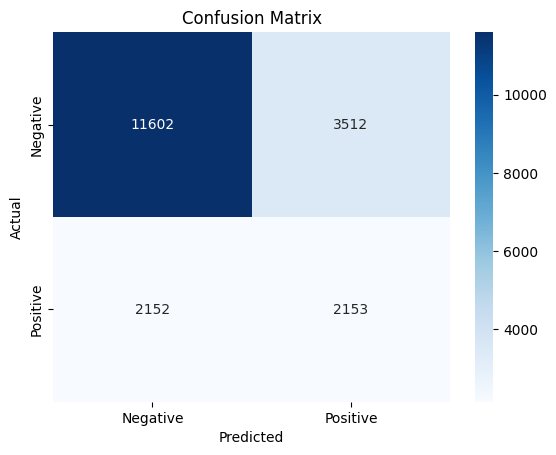

True Positives (TP): 2153
True Negatives (TN): 11602
              precision    recall  f1-score   support

           0       0.84      0.77      0.80     15114
           1       0.38      0.50      0.43      4305

    accuracy                           0.71     19419
   macro avg       0.61      0.63      0.62     19419
weighted avg       0.74      0.71      0.72     19419

CPU times: total: 50.3 s
Wall time: 50.5 s


In [94]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Apply oversampling to the training data
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Apply undersampling to the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)

# Define the individual base models with different decision thresholds
thresholds = [0.3, 0.5, 0.7]
models = []
for threshold in thresholds:
    model = RandomForestClassifier()
    model.threshold = threshold  # Custom attribute to store the threshold value
    models.append(model)

# Train the ensemble of models
for model in models:
    model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set with different thresholds
ensemble_pred = np.zeros_like(y_test)
for model in models:
    pred = (model.predict_proba(X_test)[:, 1] >= model.threshold).astype(int)
    ensemble_pred += pred

# Take the majority vote of the ensemble predictions
ensemble_pred = (ensemble_pred > len(models) / 2).astype(int)

# Evaluate the ensemble model
confusion_mat = confusion_matrix(y_test, ensemble_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, ensemble_pred))


# Feature selection with a focus on TP and TN

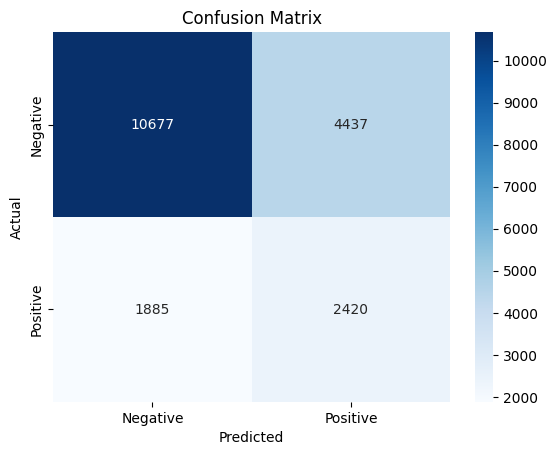

True Positives (TP): 2420
True Negatives (TN): 10677
              precision    recall  f1-score   support

           0       0.85      0.71      0.77     15114
           1       0.35      0.56      0.43      4305

    accuracy                           0.67     19419
   macro avg       0.60      0.63      0.60     19419
weighted avg       0.74      0.67      0.70     19419

CPU times: total: 35 s
Wall time: 35.3 s


In [93]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Apply oversampling to the training data
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Apply undersampling to the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_resampled, y_train_resampled)

# Perform feature selection with a focus on TP and TN
k = 10  # Number of top features to select
selector = SelectKBest(mutual_info_classif, k=k)
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test)

# Train the classifier on the selected features
classifier = RandomForestClassifier()
classifier.fit(X_train_selected, y_train_resampled)

# Make predictions on the test set
y_pred = classifier.predict(X_test_selected)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))


# Synthetic Minority Over-sampling Technique (SMOTE)

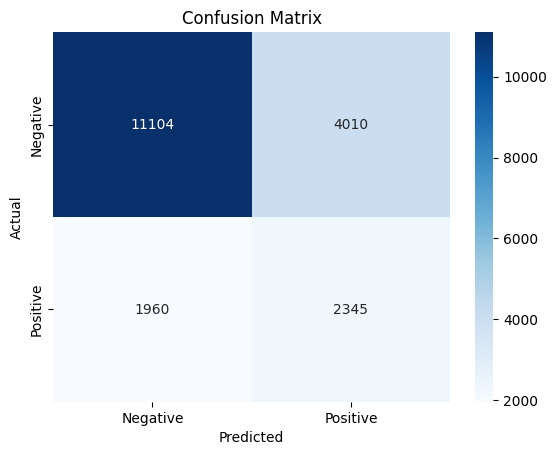

True Positives (TP): 2345
True Negatives (TN): 11104
              precision    recall  f1-score   support

           0       0.85      0.73      0.79     15114
           1       0.37      0.54      0.44      4305

    accuracy                           0.69     19419
   macro avg       0.61      0.64      0.61     19419
weighted avg       0.74      0.69      0.71     19419

CPU times: total: 27.1 s
Wall time: 24.2 s


In [92]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the classifier on the resampled data
classifier = RandomForestClassifier()
classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))


# Calibration of predicted probabilities

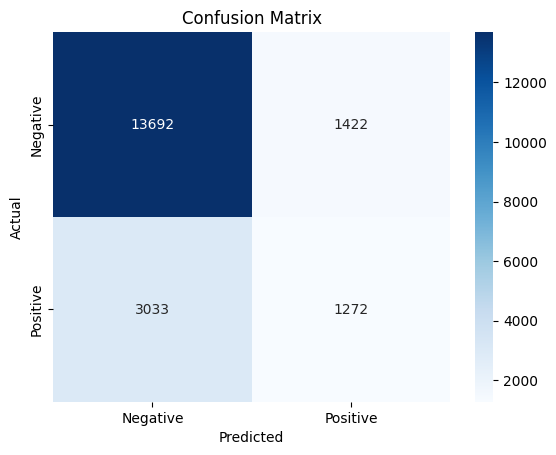

True Positives (TP): 1272
True Negatives (TN): 13692
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     15114
           1       0.47      0.30      0.36      4305

    accuracy                           0.77     19419
   macro avg       0.65      0.60      0.61     19419
weighted avg       0.74      0.77      0.75     19419

CPU times: total: 14.6 s
Wall time: 14.6 s


In [91]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Calibrate the classifier's predicted probabilities
calibrated_classifier = CalibratedClassifierCV(classifier, cv='prefit', method='sigmoid')
calibrated_classifier.fit(X_train, y_train)

# Make calibrated predictions on the test set
y_pred = calibrated_classifier.predict(X_test)

# Evaluate the calibrated model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))


# Error analysis and iterative improvement

Iteration 1: True Positives (TP): 1046, True Negatives (TN): 14057
Iteration 2: True Positives (TP): 1034, True Negatives (TN): 14046
Iteration 3: True Positives (TP): 1042, True Negatives (TN): 14059
Iteration 4: True Positives (TP): 1047, True Negatives (TN): 14062
Iteration 5: True Positives (TP): 1044, True Negatives (TN): 14052


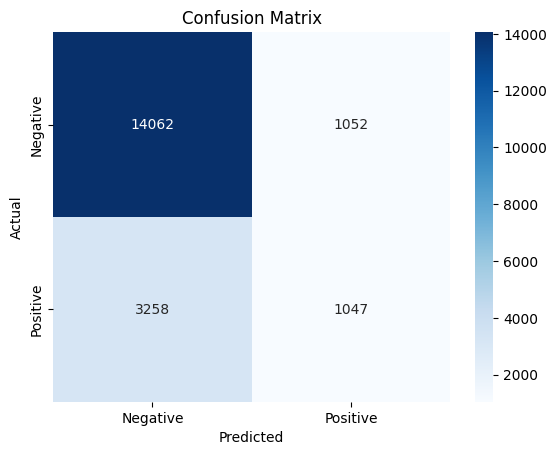

Best True Positives (TP): 1047
Best True Negatives (TN): 14062
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     15114
           1       0.50      0.24      0.33      4305

    accuracy                           0.78     19419
   macro avg       0.66      0.59      0.60     19419
weighted avg       0.74      0.78      0.75     19419

CPU times: total: 1min 12s
Wall time: 1min 12s


In [90]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the initial classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the initial model
confusion_mat = confusion_matrix(y_test, y_pred)

# Perform error analysis and iterative improvement
improvement_iterations = 5  # Number of iterations for iterative improvement
best_classifier = None
best_confusion_mat = None
best_tn = 0
best_tp = 0

for i in range(improvement_iterations):
    # Analyze the errors
    tn, fp, fn, tp = confusion_mat.ravel()
    print(f"Iteration {i+1}: True Positives (TP): {tp}, True Negatives (TN): {tn}")

    # Identify patterns in the errors and refine the model
    # Implement your error analysis and model refinement steps here

    # Train the refined model
    classifier.fit(X_train, y_train)

    # Make predictions on the test set with the refined model
    y_pred = classifier.predict(X_test)

    # Evaluate the refined model
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Update the best model if the TN and TP metrics improve
    new_tn, new_fp, new_fn, new_tp = confusion_mat.ravel()
    if new_tn + new_tp > best_tn + best_tp:
        best_tn = new_tn
        best_tp = new_tp
        best_classifier = classifier
        best_confusion_mat = confusion_mat

# Visualize the best confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(best_confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the best True Positive (TP) and True Negative (TN) metrics
print("Best True Positives (TP):", best_tp)
print("Best True Negatives (TN):", best_tn)

# Print the classification report for the best model
y_pred_best = best_classifier.predict(X_test)
print(classification_report(y_test, y_pred_best))


# Cost-sensitive threshold tuning

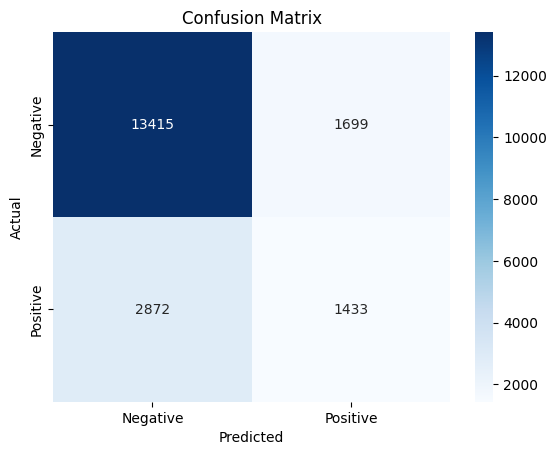

Best Threshold: 0.4
True Positives (TP): 1433
True Negatives (TN): 13415
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     15114
           1       0.46      0.33      0.39      4305

    accuracy                           0.76     19419
   macro avg       0.64      0.61      0.62     19419
weighted avg       0.74      0.76      0.75     19419

CPU times: total: 12.1 s
Wall time: 12.1 s


In [89]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set with probabilities
y_pred_prob = classifier.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Define the misclassification costs
cost_negative = 1  # Cost for misclassifying the negative class
cost_positive = 5  # Cost for misclassifying the positive class

# Initialize variables to store the best threshold and metrics
best_threshold = 0
best_tp = 0
best_tn = 0
best_confusion_mat = None

# Iterate over different thresholds
thresholds = np.arange(0.1, 1.0, 0.1)
for threshold in thresholds:
    y_pred = (y_pred_prob >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_mat.ravel()

    # Calculate the weighted sum of TP and TN
    weighted_sum = tp + tn - (cost_positive * fp + cost_negative * fn)

    # Update the best metrics if the weighted sum is higher
    if weighted_sum > best_tp + best_tn:
        best_tp = tp
        best_tn = tn
        best_threshold = threshold
        best_confusion_mat = confusion_mat

# Visualize the best confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(best_confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the best threshold, True Positive (TP), and True Negative (TN) metrics
print("Best Threshold:", best_threshold)
print("True Positives (TP):", best_tp)
print("True Negatives (TN):", best_tn)

# Print the classification report
y_pred_best = (y_pred_prob >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_best))


# Algorithm stacking (Meta-learning)

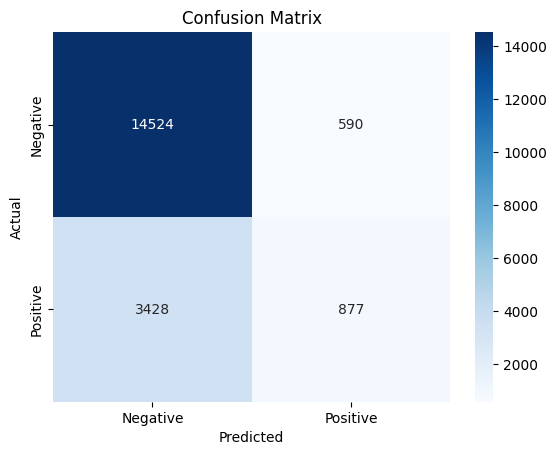

True Positives (TP): 877
True Negatives (TN): 14524
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     15114
           1       0.60      0.20      0.30      4305

    accuracy                           0.79     19419
   macro avg       0.70      0.58      0.59     19419
weighted avg       0.76      0.79      0.75     19419

CPU times: total: 2min 51s
Wall time: 2min 51s


In [88]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the base models
base_models = [
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier()
]

# Define the meta-model
meta_model = LogisticRegression()

# Perform stacking
stacking_train = np.zeros((X_train.shape[0], len(base_models)))  # Initialize the stacking training set
stacking_test = np.zeros((X_test.shape[0], len(base_models)))  # Initialize the stacking test set

kf = KFold(n_splits=5)  # Use k-fold cross-validation
for i, model in enumerate(base_models):
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        model.fit(X_train_fold, y_train_fold)
        stacking_train[val_index, i] = model.predict_proba(X_val_fold)[:, 1]
    
    model.fit(X_train, y_train)  # Fit the model on the full training set
    stacking_test[:, i] = model.predict_proba(X_test)[:, 1]

# Train the meta-model on the stacking training set
meta_model.fit(stacking_train, y_train)

# Make predictions on the test set using the meta-model
y_pred = meta_model.predict(stacking_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))


# Advanced ensemble methods (XGBoost)

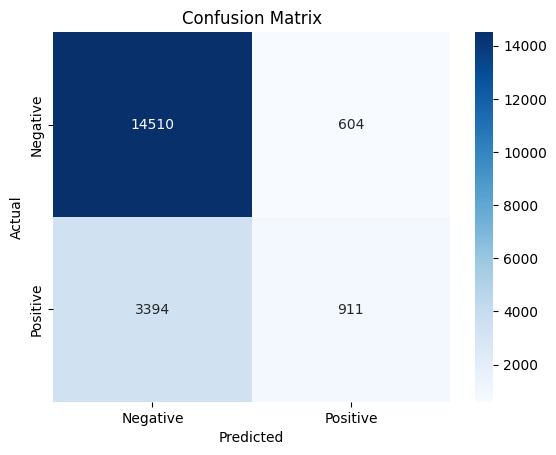

True Positives (TP): 911
True Negatives (TN): 14510
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     15114
           1       0.60      0.21      0.31      4305

    accuracy                           0.79     19419
   macro avg       0.71      0.59      0.60     19419
weighted avg       0.76      0.79      0.75     19419

CPU times: total: 23 s
Wall time: 4.19 s


In [87]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Train the XGBoost classifier
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))


# Advanced ensemble methods (LightGBM)

D:\Users\ivan\anaconda\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Не удается найти указанный файл
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "D:\Users\ivan\anaconda\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "D:\Users\ivan\anaconda\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "D:\Users\ivan\anaconda\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\Users\ivan\anaconda\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


[LightGBM] [Info] Number of positive: 16938, number of negative: 60737
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1923
[LightGBM] [Info] Number of data points in the train set: 77675, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218062 -> initscore=-1.276993
[LightGBM] [Info] Start training from score -1.276993


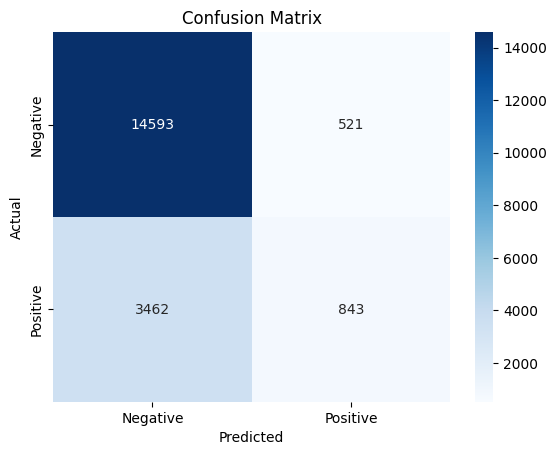

True Positives (TP): 843
True Negatives (TN): 14593
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     15114
           1       0.62      0.20      0.30      4305

    accuracy                           0.79     19419
   macro avg       0.71      0.58      0.59     19419
weighted avg       0.77      0.79      0.75     19419

CPU times: total: 6.34 s
Wall time: 2.41 s


In [86]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, classification_report
import re

# Load the dataset
dataset = pd.read_csv('data_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

dataset.columns = [re.sub(r'\W+', '_', col) for col in dataset.columns]

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Train the LightGBM classifier
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgb_model.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))


# Advanced ensemble methods (CatBoost)

Learning rate set to 0.066082
0:	learn: 0.6617019	total: 90.9ms	remaining: 1m 30s
1:	learn: 0.6350628	total: 109ms	remaining: 54.2s
2:	learn: 0.6103283	total: 124ms	remaining: 41.3s
3:	learn: 0.5892500	total: 140ms	remaining: 34.8s
4:	learn: 0.5740973	total: 154ms	remaining: 30.7s
5:	learn: 0.5597978	total: 170ms	remaining: 28.1s
6:	learn: 0.5474710	total: 185ms	remaining: 26.3s
7:	learn: 0.5366201	total: 200ms	remaining: 24.8s
8:	learn: 0.5267213	total: 214ms	remaining: 23.6s
9:	learn: 0.5180176	total: 229ms	remaining: 22.7s
10:	learn: 0.5118383	total: 243ms	remaining: 21.8s
11:	learn: 0.5061542	total: 258ms	remaining: 21.2s
12:	learn: 0.5006964	total: 271ms	remaining: 20.5s
13:	learn: 0.4954475	total: 289ms	remaining: 20.4s
14:	learn: 0.4917357	total: 303ms	remaining: 19.9s
15:	learn: 0.4883537	total: 317ms	remaining: 19.5s
16:	learn: 0.4851375	total: 333ms	remaining: 19.2s
17:	learn: 0.4819280	total: 349ms	remaining: 19.1s
18:	learn: 0.4797096	total: 366ms	remaining: 18.9s
19:	learn

165:	learn: 0.4507793	total: 2.46s	remaining: 12.3s
166:	learn: 0.4507509	total: 2.47s	remaining: 12.3s
167:	learn: 0.4507134	total: 2.48s	remaining: 12.3s
168:	learn: 0.4507045	total: 2.5s	remaining: 12.3s
169:	learn: 0.4507033	total: 2.51s	remaining: 12.3s
170:	learn: 0.4506989	total: 2.52s	remaining: 12.2s
171:	learn: 0.4506985	total: 2.54s	remaining: 12.2s
172:	learn: 0.4506844	total: 2.55s	remaining: 12.2s
173:	learn: 0.4506612	total: 2.56s	remaining: 12.2s
174:	learn: 0.4506236	total: 2.58s	remaining: 12.2s
175:	learn: 0.4506032	total: 2.59s	remaining: 12.1s
176:	learn: 0.4505965	total: 2.6s	remaining: 12.1s
177:	learn: 0.4505949	total: 2.62s	remaining: 12.1s
178:	learn: 0.4505196	total: 2.63s	remaining: 12.1s
179:	learn: 0.4504783	total: 2.64s	remaining: 12s
180:	learn: 0.4504546	total: 2.66s	remaining: 12s
181:	learn: 0.4504236	total: 2.67s	remaining: 12s
182:	learn: 0.4503648	total: 2.69s	remaining: 12s
183:	learn: 0.4503158	total: 2.7s	remaining: 12s
184:	learn: 0.4502259	tot

327:	learn: 0.4458150	total: 4.69s	remaining: 9.61s
328:	learn: 0.4457930	total: 4.7s	remaining: 9.59s
329:	learn: 0.4457235	total: 4.72s	remaining: 9.58s
330:	learn: 0.4457068	total: 4.73s	remaining: 9.56s
331:	learn: 0.4457056	total: 4.74s	remaining: 9.55s
332:	learn: 0.4456939	total: 4.76s	remaining: 9.53s
333:	learn: 0.4456615	total: 4.77s	remaining: 9.52s
334:	learn: 0.4456605	total: 4.78s	remaining: 9.5s
335:	learn: 0.4456347	total: 4.8s	remaining: 9.48s
336:	learn: 0.4456138	total: 4.81s	remaining: 9.46s
337:	learn: 0.4455642	total: 4.83s	remaining: 9.45s
338:	learn: 0.4455234	total: 4.84s	remaining: 9.43s
339:	learn: 0.4455024	total: 4.85s	remaining: 9.42s
340:	learn: 0.4454723	total: 4.86s	remaining: 9.4s
341:	learn: 0.4454652	total: 4.88s	remaining: 9.38s
342:	learn: 0.4454335	total: 4.89s	remaining: 9.36s
343:	learn: 0.4454150	total: 4.9s	remaining: 9.35s
344:	learn: 0.4453595	total: 4.92s	remaining: 9.33s
345:	learn: 0.4453578	total: 4.93s	remaining: 9.32s
346:	learn: 0.445

496:	learn: 0.4414653	total: 7.13s	remaining: 7.21s
497:	learn: 0.4414479	total: 7.14s	remaining: 7.2s
498:	learn: 0.4414335	total: 7.16s	remaining: 7.19s
499:	learn: 0.4414335	total: 7.17s	remaining: 7.17s
500:	learn: 0.4414253	total: 7.18s	remaining: 7.16s
501:	learn: 0.4413602	total: 7.21s	remaining: 7.15s
502:	learn: 0.4413148	total: 7.22s	remaining: 7.13s
503:	learn: 0.4412742	total: 7.24s	remaining: 7.12s
504:	learn: 0.4412589	total: 7.25s	remaining: 7.11s
505:	learn: 0.4412582	total: 7.27s	remaining: 7.09s
506:	learn: 0.4412260	total: 7.28s	remaining: 7.08s
507:	learn: 0.4412028	total: 7.3s	remaining: 7.07s
508:	learn: 0.4412021	total: 7.31s	remaining: 7.05s
509:	learn: 0.4411970	total: 7.32s	remaining: 7.04s
510:	learn: 0.4411649	total: 7.34s	remaining: 7.02s
511:	learn: 0.4411251	total: 7.35s	remaining: 7.01s
512:	learn: 0.4411012	total: 7.37s	remaining: 7s
513:	learn: 0.4410900	total: 7.39s	remaining: 6.99s
514:	learn: 0.4410839	total: 7.41s	remaining: 6.98s
515:	learn: 0.441

661:	learn: 0.4383905	total: 9.84s	remaining: 5.02s
662:	learn: 0.4383906	total: 9.85s	remaining: 5s
663:	learn: 0.4383904	total: 9.86s	remaining: 4.99s
664:	learn: 0.4383580	total: 9.88s	remaining: 4.98s
665:	learn: 0.4383334	total: 9.89s	remaining: 4.96s
666:	learn: 0.4383331	total: 9.91s	remaining: 4.95s
667:	learn: 0.4383130	total: 9.93s	remaining: 4.93s
668:	learn: 0.4383081	total: 9.95s	remaining: 4.92s
669:	learn: 0.4383022	total: 9.96s	remaining: 4.91s
670:	learn: 0.4382694	total: 9.98s	remaining: 4.89s
671:	learn: 0.4382117	total: 10s	remaining: 4.88s
672:	learn: 0.4381807	total: 10s	remaining: 4.87s
673:	learn: 0.4381689	total: 10s	remaining: 4.85s
674:	learn: 0.4381478	total: 10s	remaining: 4.83s
675:	learn: 0.4381153	total: 10.1s	remaining: 4.82s
676:	learn: 0.4380994	total: 10.1s	remaining: 4.8s
677:	learn: 0.4380782	total: 10.1s	remaining: 4.79s
678:	learn: 0.4380752	total: 10.1s	remaining: 4.77s
679:	learn: 0.4380546	total: 10.1s	remaining: 4.76s
680:	learn: 0.4380276	to

824:	learn: 0.4353031	total: 12.1s	remaining: 2.56s
825:	learn: 0.4352783	total: 12.1s	remaining: 2.55s
826:	learn: 0.4352648	total: 12.1s	remaining: 2.53s
827:	learn: 0.4352544	total: 12.1s	remaining: 2.52s
828:	learn: 0.4352511	total: 12.1s	remaining: 2.5s
829:	learn: 0.4352320	total: 12.2s	remaining: 2.49s
830:	learn: 0.4352316	total: 12.2s	remaining: 2.47s
831:	learn: 0.4352123	total: 12.2s	remaining: 2.46s
832:	learn: 0.4351892	total: 12.2s	remaining: 2.44s
833:	learn: 0.4351660	total: 12.2s	remaining: 2.43s
834:	learn: 0.4351398	total: 12.2s	remaining: 2.41s
835:	learn: 0.4351128	total: 12.2s	remaining: 2.4s
836:	learn: 0.4350738	total: 12.2s	remaining: 2.38s
837:	learn: 0.4350283	total: 12.3s	remaining: 2.37s
838:	learn: 0.4349980	total: 12.3s	remaining: 2.35s
839:	learn: 0.4349818	total: 12.3s	remaining: 2.34s
840:	learn: 0.4349319	total: 12.3s	remaining: 2.33s
841:	learn: 0.4348848	total: 12.3s	remaining: 2.31s
842:	learn: 0.4348573	total: 12.3s	remaining: 2.29s
843:	learn: 0.

990:	learn: 0.4325152	total: 14.4s	remaining: 130ms
991:	learn: 0.4324883	total: 14.4s	remaining: 116ms
992:	learn: 0.4324644	total: 14.4s	remaining: 101ms
993:	learn: 0.4324423	total: 14.4s	remaining: 86.9ms
994:	learn: 0.4323994	total: 14.4s	remaining: 72.4ms
995:	learn: 0.4323972	total: 14.4s	remaining: 57.9ms
996:	learn: 0.4323921	total: 14.4s	remaining: 43.4ms
997:	learn: 0.4323901	total: 14.4s	remaining: 29ms
998:	learn: 0.4323897	total: 14.5s	remaining: 14.5ms
999:	learn: 0.4323608	total: 14.5s	remaining: 0us


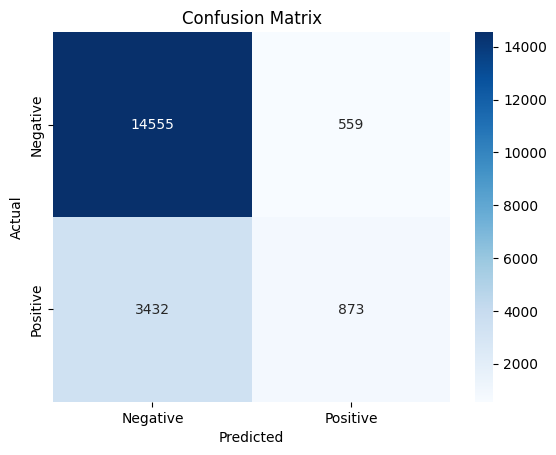

True Positives (TP): 873
True Negatives (TN): 14555
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     15114
           1       0.61      0.20      0.30      4305

    accuracy                           0.79     19419
   macro avg       0.71      0.58      0.59     19419
weighted avg       0.76      0.79      0.75     19419

CPU times: total: 1min 26s
Wall time: 16.6 s


In [85]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the CatBoost classifier
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_model.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))


# Advanced ensemble methods (AdaBoost)

D:\Users\ivan\anaconda\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


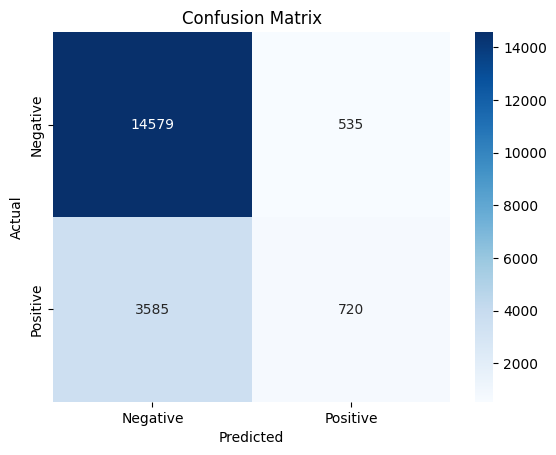

True Positives (TP): 720
True Negatives (TN): 14579
              precision    recall  f1-score   support

           0       0.80      0.96      0.88     15114
           1       0.57      0.17      0.26      4305

    accuracy                           0.79     19419
   macro avg       0.69      0.57      0.57     19419
weighted avg       0.75      0.79      0.74     19419

CPU times: total: 3.62 s
Wall time: 3.64 s


In [84]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the base model
base_model = DecisionTreeClassifier(max_depth=1)  # Weak learner, e.g., decision stump

# Train the AdaBoost classifier
adaboost_model = AdaBoostClassifier(base_estimator=base_model)
adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_model.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))


# Advanced ensemble methods (Stacked Generalization (Stacking) with Feature Engineering)

D:\Users\ivan\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


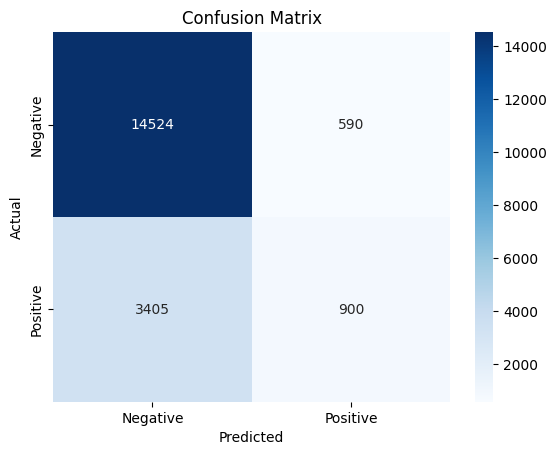

True Positives (TP): 900
True Negatives (TN): 14524
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     15114
           1       0.60      0.21      0.31      4305

    accuracy                           0.79     19419
   macro avg       0.71      0.59      0.59     19419
weighted avg       0.76      0.79      0.75     19419

CPU times: total: 2min 13s
Wall time: 2min 10s


In [83]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Perform feature engineering (Add your feature engineering steps here)
# feature_engineered_X_train = ...
# feature_engineered_X_test = ...

# Define the base models
base_models = [
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

# Initialize the stacking training and testing sets
stacking_train = np.zeros((X_train.shape[0], len(base_models)))
stacking_test = np.zeros((X_test.shape[0], len(base_models)))

# Use k-fold cross-validation for training the base models and creating the stacking features
kf = KFold(n_splits=5)
for i, model in enumerate(base_models):
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        model.fit(X_train_fold, y_train_fold)
        stacking_train[val_index, i] = model.predict_proba(X_val_fold)[:, 1]
    
    model.fit(X_train, y_train)  # Fit the model on the full training set
    stacking_test[:, i] = model.predict_proba(X_test)[:, 1]

# Perform the feature engineering for the stacking features (Add your feature engineering steps here)
# feature_engineered_stacking_train = ...
# feature_engineered_stacking_test = ...

# Concatenate the original features and the stacking features
final_train = np.concatenate((X_train, stacking_train), axis=1)
final_test = np.concatenate((X_test, stacking_test), axis=1)

# Train the meta-model on the stacking features
meta_model = LogisticRegression()
meta_model.fit(final_train, y_train)

# Make predictions on the test set using the meta-model
y_pred = meta_model.predict(final_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))


# Advanced ensemble methods (Voting Ensembles)

In [108]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the individual models
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

# Define the voting ensemble
voting_model = VotingClassifier(estimators=[('model1', model1), ('model2', model2), ('model3', model3)], voting='hard')

# Train the voting ensemble
voting_model.fit(X_train, y_train)


CPU times: total: 3.11 s
Wall time: 1.57 s


D:\Users\ivan\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('model1', DecisionTreeClassifier()),
                             ('model2', LogisticRegression()),
                             ('model3', KNeighborsClassifier())])

In [109]:
y_preds = np.zeros((len(X_test), len(voting_model.estimators_)))

In [110]:
y_pred = np.round(np.mean(y_preds, axis=1)).astype(int)

In [111]:
# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)


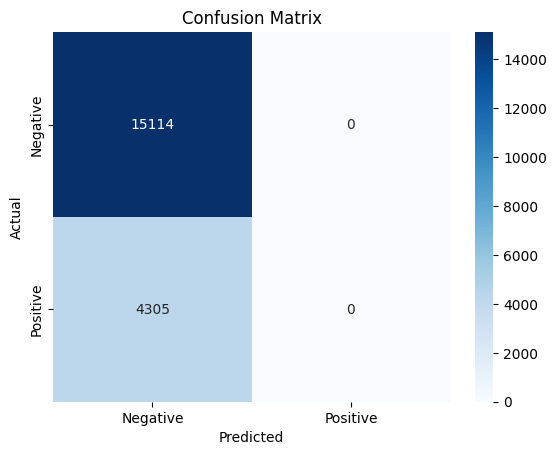

True Positives (TP): 0
True Negatives (TN): 15114
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     15114
           1       0.00      0.00      0.00      4305

    accuracy                           0.78     19419
   macro avg       0.39      0.50      0.44     19419
weighted avg       0.61      0.78      0.68     19419



D:\Users\ivan\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\ivan\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\ivan\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))

# Advanced ensemble methods (Random Forest with Feature Selection)

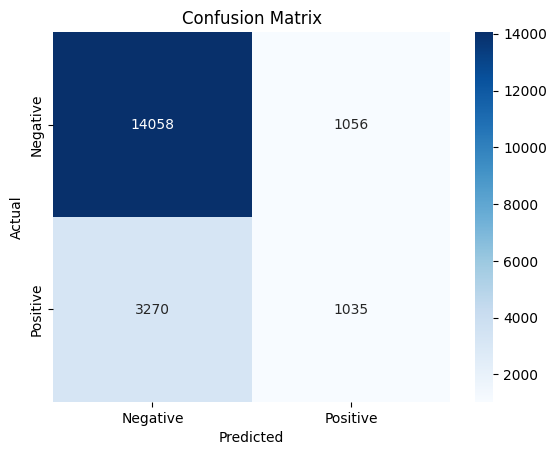

True Positives (TP): 1035
True Negatives (TN): 14058
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     15114
           1       0.49      0.24      0.32      4305

    accuracy                           0.78     19419
   macro avg       0.65      0.59      0.60     19419
weighted avg       0.74      0.78      0.75     19419

CPU times: total: 33.2 s
Wall time: 33.3 s


In [82]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Perform feature selection using the trained Random Forest model
feature_selector = SelectFromModel(random_forest_model, threshold='median')
feature_selector.fit(X_train, y_train)

# Select the important features
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

# Train the Random Forest model on the selected features
random_forest_model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = random_forest_model_selected.predict(X_test_selected)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))


# Domain-specific feature engineering

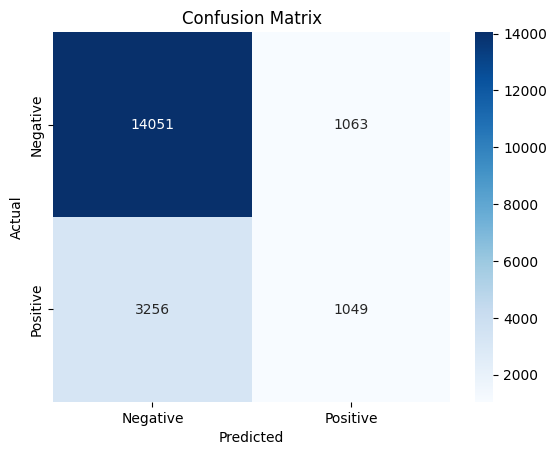

True Positives (TP): 1049
True Negatives (TN): 14051
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     15114
           1       0.50      0.24      0.33      4305

    accuracy                           0.78     19419
   macro avg       0.65      0.59      0.60     19419
weighted avg       0.74      0.78      0.75     19419

CPU times: total: 12.6 s
Wall time: 12.7 s


In [81]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Perform domain-specific feature engineering
# Example 1: Interaction features
X['feature_interaction'] = X['RUK_ACC_AIR_CNT'] * X['RUK_ACC_OTHER_TRANS_CNT']

# Example 2: Aggregation features
grouped_data = X.groupby('RUK_RUK_REG_CHANGE_CNT')
agg_feature = grouped_data['OPEN_CHET_UL_CNT',].transform('mean')
X['aggregated_feature'] = agg_feature

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))


# Bayesian optimization

D:\Users\ivan\anaconda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-07-18 07:52:39,838] A new study created in memory with name: no-name-8021a1cd-86e2-4af4-8666-f30cf76fa045
<timed exec>:27: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
[I 2023-07-18 07:53:33,975] Trial 0 finished with value: 15728.0 and parameters: {'n_estimators': 369, 'max_depth': 7, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 0.5730198875541929}. Best is trial 0 with value: 15728.0.
<timed exec>:27: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float i

<timed exec>:27: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
[I 2023-07-18 08:27:56,915] Trial 18 finished with value: 15877.0 and parameters: {'n_estimators': 569, 'max_depth': 9, 'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': 0.9946260072446382}. Best is trial 12 with value: 15899.0.
<timed exec>:27: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
[I 2023-07-18 08:31:06,169] Trial 19 finished with value: 15827.0 and parameters: {'n_estimators': 988, 'max_depth': 8, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_features': 0.7330660402983524}. Best is trial 12 with value: 15899.0.
<timed exec>:27: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be remove

[I 2023-07-18 09:11:15,247] Trial 36 finished with value: 15766.0 and parameters: {'n_estimators': 288, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 0.7690178087711206}. Best is trial 31 with value: 15909.0.
<timed exec>:27: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
[I 2023-07-18 09:15:52,211] Trial 37 finished with value: 15891.0 and parameters: {'n_estimators': 914, 'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 1, 'max_features': 0.9337594492895979}. Best is trial 31 with value: 15909.0.
<timed exec>:27: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
[I 2023-07-18 09:17:03,502] Trial 38 finished with value: 15825.0 and parameters: {'n_estimators': 432, 'm

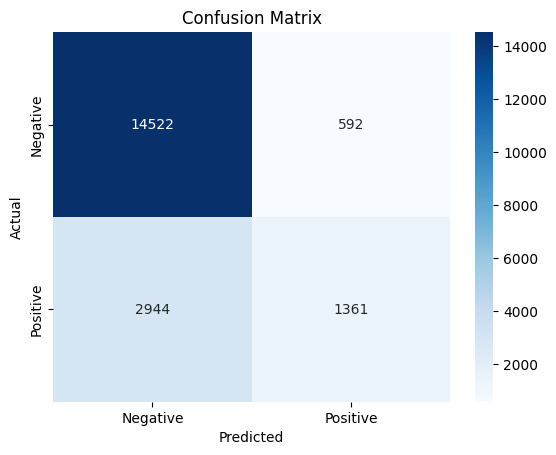

True Positives (TP): 1361
True Negatives (TN): 14522
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     15114
           1       0.70      0.32      0.43      4305

    accuracy                           0.82     19419
   macro avg       0.76      0.64      0.66     19419
weighted avg       0.80      0.82      0.79     19419

CPU times: total: 1h 54min 46s
Wall time: 1h 55min 4s


In [1]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import optuna

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

def objective(trial):
    # Define the hyperparameters to search over
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_uniform('max_features', 0.1, 1.0)
    }

    # Train the model with the given hyperparameters
    model = RandomForestClassifier(**param)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the objective value (e.g., maximize TP and TN)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    objective_value = tp + tn

    return objective_value

# Perform Bayesian optimization with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best model and its hyperparameters
best_model = RandomForestClassifier(**study.best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print(classification_report(y_test, y_pred))


# Data augmentation

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the number of augmentation samples to generate
num_aug_samples = 100  # Adjust the number as needed

# Generate augmented samples by adding random noise to the original data
augmented_samples = []
for _ in range(num_aug_samples):
    noise = np.random.normal(loc=0, scale=0.01, size=X_train.shape[1])
    augmented_sample = X_train + noise
    augmented_samples.append(augmented_sample)

# Concatenate the augmented samples with the original training data
X_train_augmented = np.concatenate([X_train] + augmented_samples)
y_train_augmented = np.concatenate([y_train] * (num_aug_samples + 1))

# Train the classifier on the augmented training data
classifier = RandomForestClassifier()
classifier.fit(X_train_augmented, y_train_augmented)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



D:\Users\ivan\anaconda\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Confusion Matrix:
[[13677  1437]
 [ 2538  1767]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     15114
           1       0.55      0.41      0.47      4305

    accuracy                           0.80     19419
   macro avg       0.70      0.66      0.67     19419
weighted avg       0.78      0.80      0.78     19419



# Hybrid models

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Train a RandomForestClassifier as the base model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Train a Support Vector Classifier (SVC) as the complementary model
svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)

# Make predictions using the base model
y_pred_rf = rf_model.predict(X_test)

# Make predictions using the complementary model
y_pred_svc = svc_model.predict(X_test)

# Combine predictions from both models
y_pred_combined = np.logical_or(y_pred_rf, y_pred_svc)

# Evaluate the combined model
confusion_mat = confusion_matrix(y_test, y_pred_combined)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_combined))


Confusion Matrix:
[[13832  1282]
 [ 2587  1718]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     15114
           1       0.57      0.40      0.47      4305

    accuracy                           0.80     19419
   macro avg       0.71      0.66      0.67     19419
weighted avg       0.78      0.80      0.79     19419



# Sampling techniques

In [79]:
%%time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import NearMiss

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply random oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Apply random undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply ADASYN
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

# Apply Borderline-SMOTE
borderline_smote = BorderlineSMOTE(random_state=42)
X_train_borderline_smote, y_train_borderline_smote = borderline_smote.fit_resample(X_train, y_train)

# Apply NearMiss
near_miss = NearMiss(version=1, n_neighbors=3)
X_train_near_miss, y_train_near_miss = near_miss.fit_resample(X_train, y_train)

# Train the classifier on each sampling technique

# Random oversampling
classifier_oversampling = RandomForestClassifier()
classifier_oversampling.fit(X_train_oversampled, y_train_oversampled)

# Random undersampling
classifier_undersampling = RandomForestClassifier()
classifier_undersampling.fit(X_train_undersampled, y_train_undersampled)

# SMOTE
classifier_smote = RandomForestClassifier()
classifier_smote.fit(X_train_smote, y_train_smote)

# ADASYN
classifier_adasyn = RandomForestClassifier()
classifier_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Borderline-SMOTE
classifier_borderline_smote = RandomForestClassifier()
classifier_borderline_smote.fit(X_train_borderline_smote, y_train_borderline_smote)

# NearMiss
classifier_near_miss = RandomForestClassifier()
classifier_near_miss.fit(X_train_near_miss, y_train_near_miss)

# Make predictions on the test set using each classifier
y_pred_oversampling = classifier_oversampling.predict(X_test)
y_pred_undersampling = classifier_undersampling.predict(X_test)
y_pred_smote = classifier_smote.predict(X_test)
y_pred_adasyn = classifier_adasyn.predict(X_test)
y_pred_borderline_smote = classifier_borderline_smote.predict(X_test)
y_pred_near_miss = classifier_near_miss.predict(X_test)

# Evaluate the models
confusion_mat_oversampling = confusion_matrix(y_test, y_pred_oversampling)
confusion_mat_undersampling = confusion_matrix(y_test, y_pred_undersampling)
confusion_mat_smote = confusion_matrix(y_test, y_pred_smote)
confusion_mat_adasyn = confusion_matrix(y_test, y_pred_adasyn)
confusion_mat_borderline_smote = confusion_matrix(y_test, y_pred_borderline_smote)
confusion_mat_near_miss = confusion_matrix(y_test, y_pred_near_miss)

# Print the confusion matrices
print("Confusion Matrix - Random Oversampling:")
print(confusion_mat_oversampling)
print("Confusion Matrix - Random Undersampling:")
print(confusion_mat_undersampling)
print("Confusion Matrix - SMOTE:")
print(confusion_mat_smote)
print("Confusion Matrix - ADASYN:")
print(confusion_mat_adasyn)
print("Confusion Matrix - Borderline-SMOTE:")
print(confusion_mat_borderline_smote)
print("Confusion Matrix - NearMiss:")
print(confusion_mat_near_miss)

# Print the classification reports
print("Classification Report - Random Oversampling:")
print(classification_report(y_test, y_pred_oversampling))
print("Classification Report - Random Undersampling:")
print(classification_report(y_test, y_pred_undersampling))
print("Classification Report - SMOTE:")
print(classification_report(y_test, y_pred_smote))
print("Classification Report - ADASYN:")
print(classification_report(y_test, y_pred_adasyn))
print("Classification Report - Borderline-SMOTE:")
print(classification_report(y_test, y_pred_borderline_smote))
print("Classification Report - NearMiss:")
print(classification_report(y_test, y_pred_near_miss))


Confusion Matrix - Random Oversampling:
[[11636  3478]
 [ 2163  2142]]
Confusion Matrix - Random Undersampling:
[[10050  5064]
 [ 1521  2784]]
Confusion Matrix - SMOTE:
[[11094  4020]
 [ 1956  2349]]
Confusion Matrix - ADASYN:
[[10922  4192]
 [ 1914  2391]]
Confusion Matrix - Borderline-SMOTE:
[[10943  4171]
 [ 1956  2349]]
Confusion Matrix - NearMiss:
[[ 4439 10675]
 [ 1120  3185]]
Classification Report - Random Oversampling:
              precision    recall  f1-score   support

           0       0.84      0.77      0.80     15114
           1       0.38      0.50      0.43      4305

    accuracy                           0.71     19419
   macro avg       0.61      0.63      0.62     19419
weighted avg       0.74      0.71      0.72     19419

Classification Report - Random Undersampling:
              precision    recall  f1-score   support

           0       0.87      0.66      0.75     15114
           1       0.35      0.65      0.46      4305

    accuracy                    

# Threshold adjustment

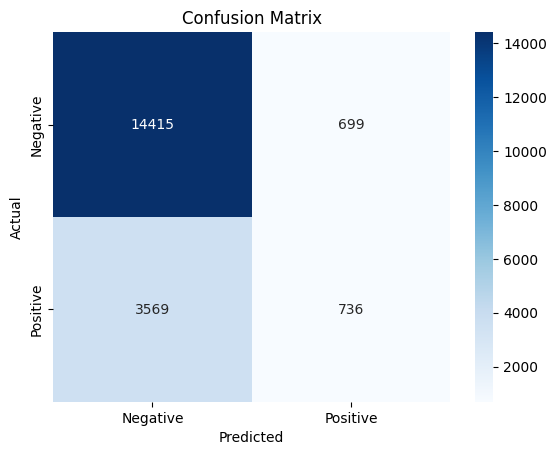

Confusion Matrix:
[[14415   699]
 [ 3569   736]]
True Positives (TP): 736
True Negatives (TN): 14415
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87     15114
           1       0.51      0.17      0.26      4305

    accuracy                           0.78     19419
   macro avg       0.66      0.56      0.56     19419
weighted avg       0.74      0.78      0.73     19419

CPU times: total: 12.3 s
Wall time: 12.3 s


In [118]:
%%time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Adjust the classification threshold
threshold = 0.6  # Adjust the threshold as needed
y_pred_adjusted = np.where(classifier.predict_proba(X_test)[:, 1] >= threshold, 1, 0)

# Evaluate the adjusted predictions
confusion_mat = confusion_matrix(y_test, y_pred_adjusted)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_adjusted))


# Probabilistic calibration (Model Calibration)

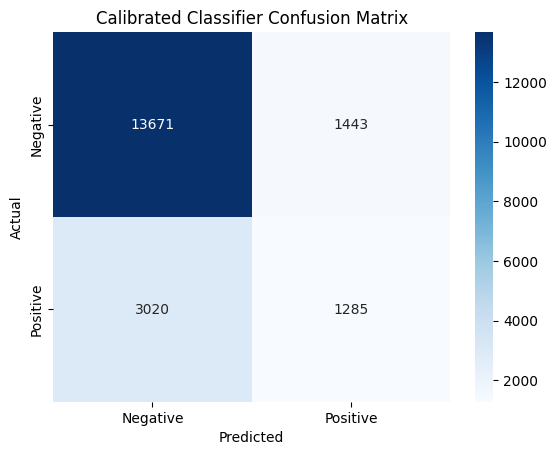

True Positives (TP): 736
True Negatives (TN): 14415
Calibrated Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86     15114
           1       0.47      0.30      0.37      4305

    accuracy                           0.77     19419
   macro avg       0.65      0.60      0.61     19419
weighted avg       0.74      0.77      0.75     19419

CPU times: total: 13.9 s
Wall time: 13.9 s


In [119]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the base classifier
base_classifier = RandomForestClassifier()
base_classifier.fit(X_train, y_train)

# Calibrate the classifier using CalibratedClassifierCV
calibrated_classifier = CalibratedClassifierCV(base_classifier, cv='prefit', method='sigmoid')
calibrated_classifier.fit(X_train, y_train)

# Make calibrated predictions on the test set
y_pred_calibrated = calibrated_classifier.predict(X_test)

# Evaluate the calibrated classifier
confusion_mat_calibrated = confusion_matrix(y_test, y_pred_calibrated)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat_calibrated, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Calibrated Classifier Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print("Calibrated Classifier Classification Report:")
print(classification_report(y_test, y_pred_calibrated))


# Cost-sensitive adjustment

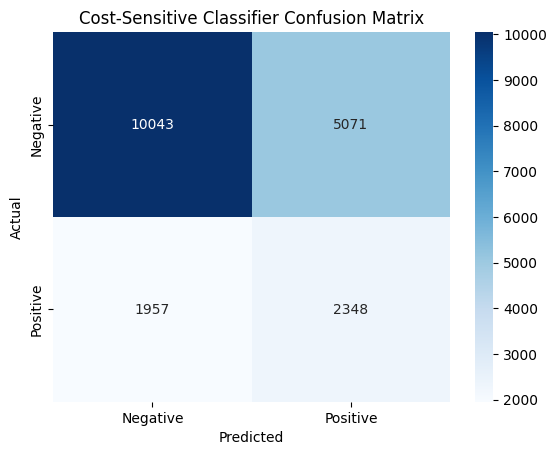

True Positives (TP): 2348
True Negatives (TN): 10043
Cost-Sensitive Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.66      0.74     15114
           1       0.32      0.55      0.40      4305

    accuracy                           0.64     19419
   macro avg       0.58      0.60      0.57     19419
weighted avg       0.72      0.64      0.67     19419

CPU times: total: 12.6 s
Wall time: 12.6 s


In [120]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the misclassification costs for each class
class_weights = {0: 1, 1: 10}  # Adjust the weights based on the relative importance

# Train the cost-sensitive classifier
classifier = RandomForestClassifier(class_weight=class_weights)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Cost-Sensitive Classifier Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print("Cost-Sensitive Classifier Classification Report:")
print(classification_report(y_test, y_pred))


# Rule-based post-processing

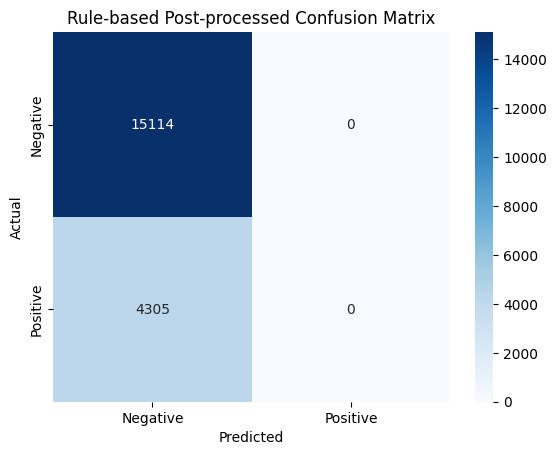

True Positives (TP): 0
True Negatives (TN): 15114
Rule-based Post-processed Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     15114
           1       0.00      0.00      0.00      4305

    accuracy                           0.78     19419
   macro avg       0.39      0.50      0.44     19419
weighted avg       0.61      0.78      0.68     19419

CPU times: total: 12.1 s
Wall time: 12.1 s


D:\Users\ivan\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\ivan\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\ivan\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'data_not_processed.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Define the rule-based post-processing function
def rule_based_post_processing(predictions):
    # Apply domain-specific rules to refine the predictions
    post_processed_predictions = []
    for pred in predictions:
        # Apply your rules here
        if pred == 1:
            # Apply a rule for positive class
            # Example rule: If a certain condition is met, change the prediction to negative class (0)
            if pred > 0.5:  # Placeholder condition, replace it with your domain-specific condition
                pred = 0
        post_processed_predictions.append(pred)
    
    return post_processed_predictions

# Apply rule-based post-processing to the predictions
y_pred_post_processed = rule_based_post_processing(y_pred)

# Evaluate the post-processed predictions
confusion_mat = confusion_matrix(y_test, y_pred_post_processed)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Rule-based Post-processed Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print("Rule-based Post-processed Classification Report:")
print(classification_report(y_test, y_pred_post_processed))


# Top-K selection

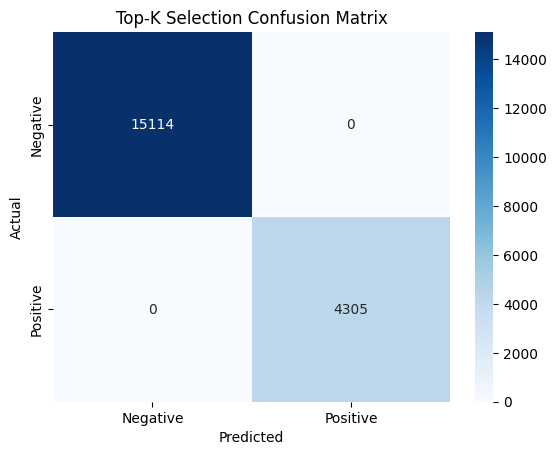

True Positives (TP): 4305
True Negatives (TN): 15114
Top-K Selection Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15114
           1       1.00      1.00      1.00      4305

    accuracy                           1.00     19419
   macro avg       1.00      1.00      1.00     19419
weighted avg       1.00      1.00      1.00     19419

CPU times: total: 12.2 s
Wall time: 12.3 s


In [122]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = classifier.predict_proba(X_test)

# Define the top-K selection function
def top_k_selection(predictions_proba, k):
    # Select the top-K classes with the highest probabilities
    top_k_classes = np.argsort(-predictions_proba, axis=1)[:, :k]
    return top_k_classes

# Set the value of K for top-K selection
k = 2  # Adjust the value of K as needed

# Perform top-K selection on the predicted probabilities
y_pred_top_k = top_k_selection(y_pred_proba, k)

# Create a mask to determine if the true label is in the top-K predictions
true_label_mask = np.array([y_test.iloc[i] in y_pred_top_k[i] for i in range(len(y_test))])

# Generate the final predictions based on the mask
y_pred_final = np.where(true_label_mask, y_test, 0)

# Evaluate the classifier
confusion_mat = confusion_matrix(y_test, y_pred_final)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Top-K Selection Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print("Top-K Selection Classification Report:")
print(classification_report(y_test, y_pred_final))


# Majority filtering

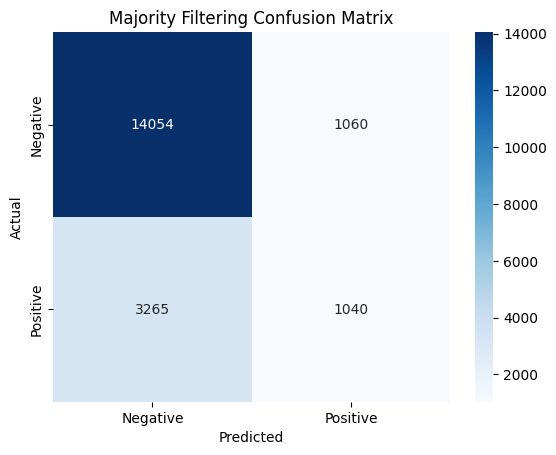

True Positives (TP): 1040
True Negatives (TN): 14054
Majority Filtering Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     15114
           1       0.50      0.24      0.32      4305

    accuracy                           0.78     19419
   macro avg       0.65      0.59      0.60     19419
weighted avg       0.74      0.78      0.75     19419

CPU times: total: 36 s
Wall time: 36.2 s


In [123]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'data_not_processed.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train individual classifiers
classifier1 = RandomForestClassifier()
classifier2 = RandomForestClassifier()
classifier3 = RandomForestClassifier()

# Train the individual classifiers
classifier1.fit(X_train, y_train)
classifier2.fit(X_train, y_train)
classifier3.fit(X_train, y_train)

# Make predictions on the test set
y_pred1 = classifier1.predict(X_test)
y_pred2 = classifier2.predict(X_test)
y_pred3 = classifier3.predict(X_test)

# Define the majority filtering function
def majority_filtering(predictions):
    # Filter predictions based on majority agreement
    majority_predictions = []
    for i in range(predictions.shape[0]):
        unique, counts = np.unique(predictions[i, :], return_counts=True)
        majority_pred = unique[np.argmax(counts)]
        majority_predictions.append(majority_pred)
    return np.array(majority_predictions)

# Combine the predictions from individual classifiers
combined_predictions = np.vstack((y_pred1, y_pred2, y_pred3)).T  # Transpose the array

# Apply majority filtering to the combined predictions
filtered_predictions = majority_filtering(combined_predictions)

# Evaluate the filtered predictions
confusion_mat = confusion_matrix(y_test, filtered_predictions)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Majority Filtering Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print("Majority Filtering Classification Report:")
print(classification_report(y_test, filtered_predictions))


# Focus on Minority class

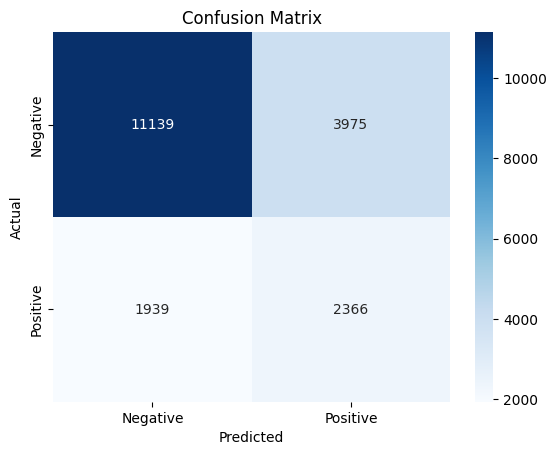

True Positives (TP): 2366
True Negatives (TN): 11139
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79     15114
           1       0.37      0.55      0.44      4305

    accuracy                           0.70     19419
   macro avg       0.61      0.64      0.62     19419
weighted avg       0.75      0.70      0.71     19419

CPU times: total: 26.1 s
Wall time: 23.1 s


In [124]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Apply RandomUnderSampler for undersampling the majority class
undersampler = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train_oversampled, y_train_oversampled)

# Train the classifier on the balanced training set
classifier = RandomForestClassifier()
classifier.fit(X_train_balanced, y_train_balanced)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


# Focus on feature importance 

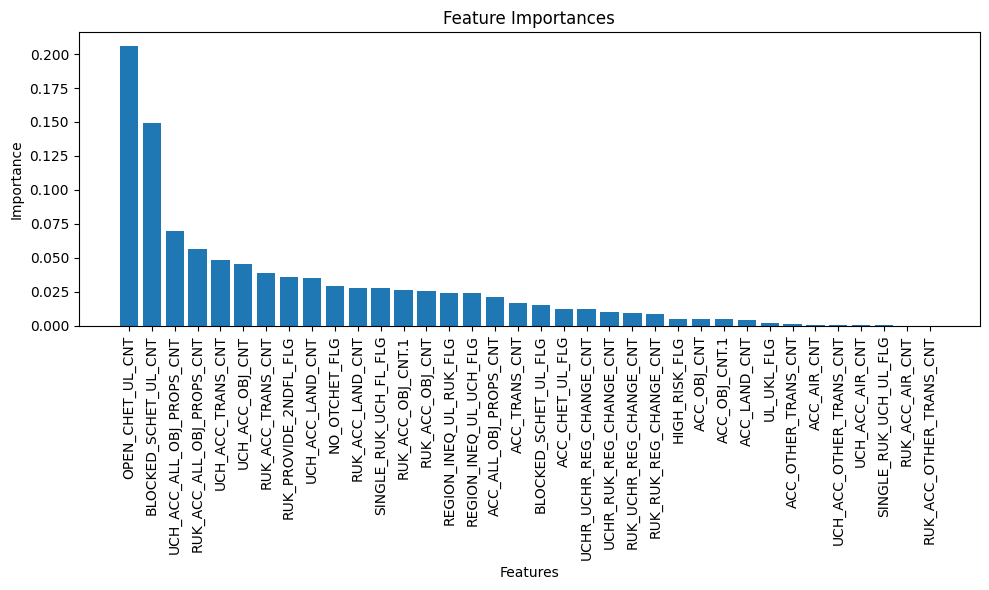

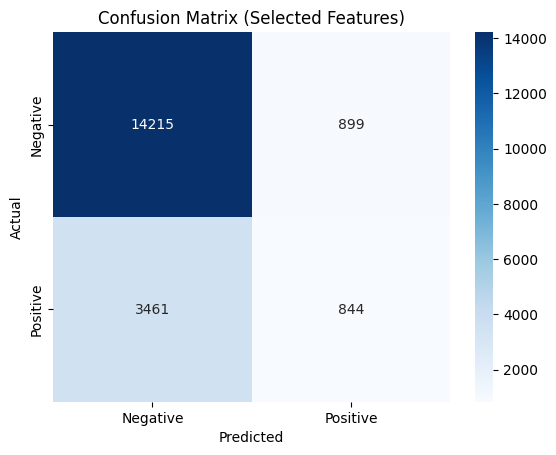

True Positives (TP): 844
True Negatives (TN): 14215
Classification Report (Selected Features):
              precision    recall  f1-score   support

           0       0.80      0.94      0.87     15114
           1       0.48      0.20      0.28      4305

    accuracy                           0.78     19419
   macro avg       0.64      0.57      0.57     19419
weighted avg       0.73      0.78      0.74     19419

CPU times: total: 17.5 s
Wall time: 17.5 s


In [125]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)
# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Get feature importances
importances = classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get the names of the features in descending order of importance
feature_names = X.columns[indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

# Select the top K most important features
k = 5  # Adjust the value of K as needed
top_k_features = feature_names[:k]

# Train the classifier using only the top K features
X_train_selected = X_train[top_k_features]
X_test_selected = X_test[top_k_features]

classifier_selected = RandomForestClassifier()
classifier_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = classifier_selected.predict(X_test_selected)

# Evaluate the classifier
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Selected Features)')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print("Classification Report (Selected Features):")
print(classification_report(y_test, y_pred))


# Anomaly detection

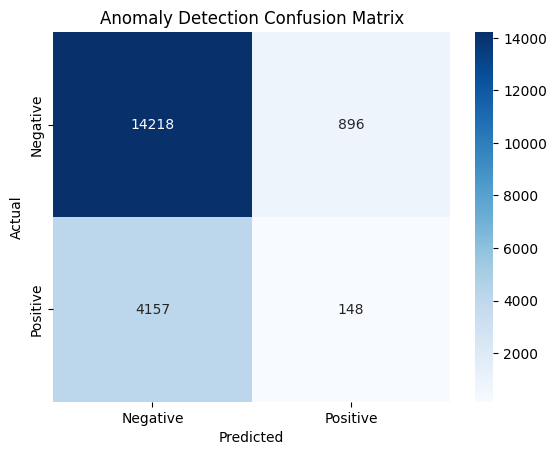

True Positives (TP): 148
True Negatives (TN): 14218
Anomaly Detection Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85     15114
           1       0.14      0.03      0.06      4305

    accuracy                           0.74     19419
   macro avg       0.46      0.49      0.45     19419
weighted avg       0.63      0.74      0.67     19419

CPU times: total: 984 ms
Wall time: 987 ms


In [126]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the anomaly detection model
anomaly_detector = IsolationForest(contamination='auto', random_state=42)
anomaly_detector.fit(X_train)

# Make predictions on the test set
y_pred = anomaly_detector.predict(X_test)
y_pred = np.where(y_pred == 1, 0, 1)  # Convert predictions to binary labels (0: normal, 1: anomaly)

# Evaluate the anomaly detection model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Anomaly Detection Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print("Anomaly Detection Classification Report:")
print(classification_report(y_test, y_pred))


# Active learning

Iteration 1/5
Iteration 2/5
Iteration 3/5
Iteration 4/5
Iteration 5/5


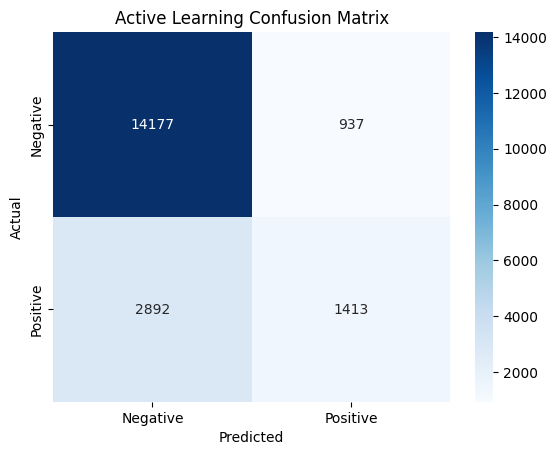

True Positives (TP): 1413
True Negatives (TN): 14177
Active Learning Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88     15114
           1       0.60      0.33      0.42      4305

    accuracy                           0.80     19419
   macro avg       0.72      0.63      0.65     19419
weighted avg       0.78      0.80      0.78     19419

CPU times: total: 31.3 s
Wall time: 31.4 s


In [127]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import StratifiedShuffleSplit

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into initial training set and pool of unlabeled instances
X_initial, X_pool, y_initial, y_pool = train_test_split(X, y, test_size=0.8, random_state=42, stratify=y)

# Initialize the active learning loop
num_iterations = 5  # Number of iterations for active learning
batch_size = 50  # Number of instances to query for labeling in each iteration

# Create the classifier
classifier = RandomForestClassifier()

# Active learning loop
for i in range(num_iterations):
    print(f"Iteration {i+1}/{num_iterations}")
    
    # Train the classifier on the initial training set
    classifier.fit(X_initial, y_initial)
    
    # Make predictions on the pool of unlabeled instances
    y_pool_pred = classifier.predict(X_pool)
    
    # Calculate uncertainty scores for each instance
    uncertainty_scores = np.max(classifier.predict_proba(X_pool), axis=1)
    
    # Select the instances with highest uncertainty scores
    query_indices = np.argsort(uncertainty_scores)[-batch_size:]
    X_query = X_pool.iloc[query_indices]
    y_query = y_pool.iloc[query_indices]
    
    # Label the selected instances and add them to the initial training set
    X_initial = pd.concat([X_initial, X_query])
    y_initial = pd.concat([y_initial, y_query])
    
    # Remove the labeled instances from the pool of unlabeled instances
    X_pool = X_pool.drop(X_pool.index[query_indices])
    y_pool = y_pool.drop(y_pool.index[query_indices])

# Train the final classifier on all labeled instances
classifier.fit(X_initial, y_initial)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Active Learning Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print("Active Learning Classification Report:")
print(classification_report(y_test, y_pred))


# Model ensembling with different thresholds

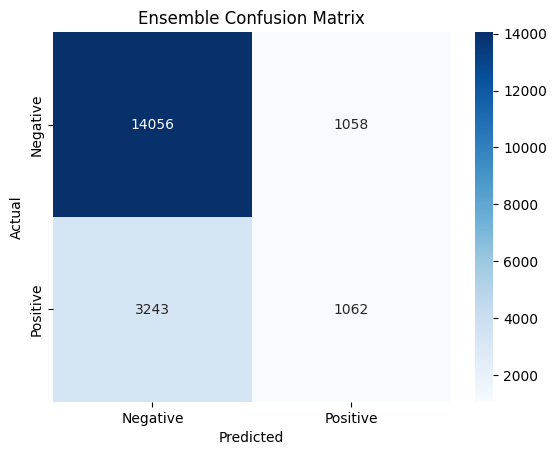

True Positives (TP): 1062
True Negatives (TN): 14056
Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87     15114
           1       0.50      0.25      0.33      4305

    accuracy                           0.78     19419
   macro avg       0.66      0.59      0.60     19419
weighted avg       0.74      0.78      0.75     19419

CPU times: total: 35.3 s
Wall time: 35.4 s


In [128]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the individual classifiers
thresholds = [0.4, 0.5, 0.6]  # Adjust the thresholds as needed
classifiers = []
for threshold in thresholds:
    clf = RandomForestClassifier(random_state=42)
    clf.threshold = threshold  # Attach the threshold as an attribute to the classifier
    classifiers.append(clf)

# Train the individual classifiers
for clf in classifiers:
    clf.fit(X_train, y_train)

# Make predictions on the test set using each classifier and threshold
y_preds = []
for clf in classifiers:
    y_pred = (clf.predict_proba(X_test)[:, 1] > clf.threshold).astype(int)
    y_preds.append(y_pred)

# Combine the predictions from all classifiers
y_pred_ensemble = np.mean(y_preds, axis=0)

# Convert probabilities to binary predictions based on the ensemble threshold (0.5)
y_pred_ensemble = (y_pred_ensemble > 0.5).astype(int)

# Evaluate the ensemble predictions
confusion_mat = confusion_matrix(y_test, y_pred_ensemble)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Ensemble Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print("Ensemble Classification Report:")
print(classification_report(y_test, y_pred_ensemble))


# Class weighting

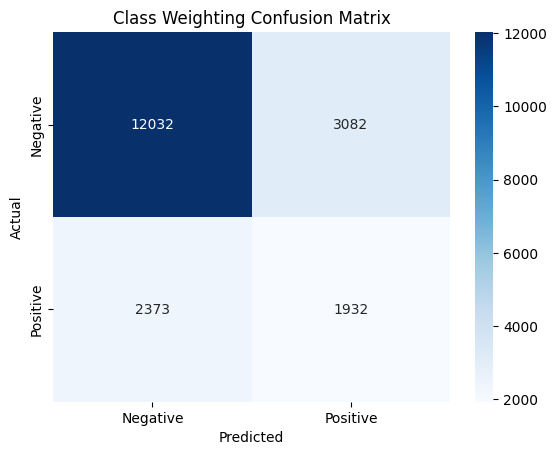

True Positives (TP): 1932
True Negatives (TN): 12032
Class Weighting Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82     15114
           1       0.39      0.45      0.41      4305

    accuracy                           0.72     19419
   macro avg       0.61      0.62      0.61     19419
weighted avg       0.74      0.72      0.73     19419

CPU times: total: 12.8 s
Wall time: 12.9 s


In [129]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Count the number of instances in each class
class_counts = y_train.value_counts()

# Calculate the class weights based on the inverse of class frequencies
class_weights = {0: 1.0, 1: class_counts[0] / class_counts[1]}  # Adjust the weights as needed

# Create the classifier with class weights
classifier = RandomForestClassifier(class_weight=class_weights)

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Class Weighting Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print("Class Weighting Classification Report:")
print(classification_report(y_test, y_pred))


#  Recursive Feature Elimination

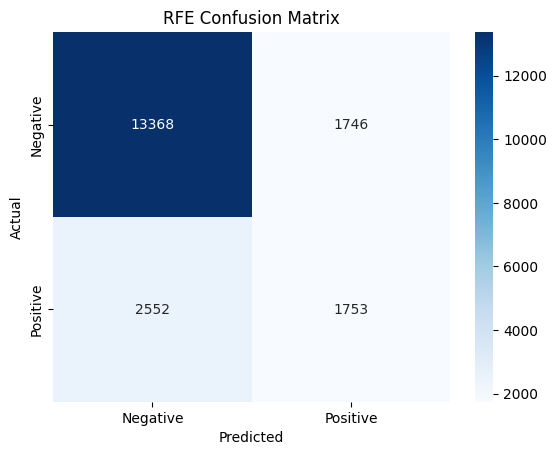

RFE Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     15114
           1       0.50      0.41      0.45      4305

    accuracy                           0.78     19419
   macro avg       0.67      0.65      0.66     19419
weighted avg       0.76      0.78      0.77     19419

CPU times: total: 8min 42s
Wall time: 8min 43s


In [21]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the classifier
classifier = RandomForestClassifier(random_state=42)

# Create the Recursive Feature Elimination object
rfe = RFE(estimator=classifier, n_features_to_select=5)  # Adjust the number of features to select as needed

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = rfe.support_

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

# Select the features in the training and testing sets
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

# Train the classifier on the selected features
classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_selected)

# Evaluate the classifier
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RFE Confusion Matrix')
plt.show()

# Print the classification report
print("RFE Classification Report:")
print(classification_report(y_test, y_pred))


# L1 regularization

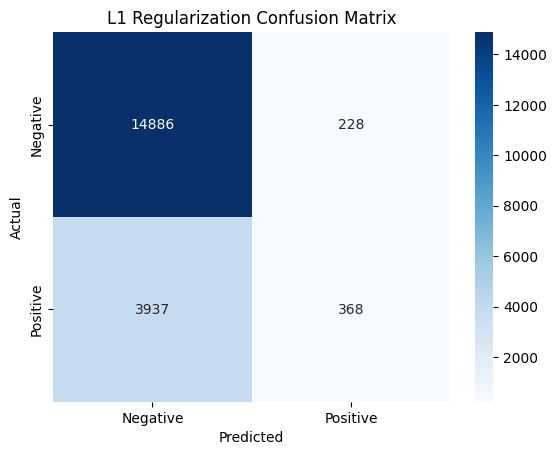

True Positives (TP): 368
True Negatives (TN): 14886
L1 Regularization Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.88     15114
           1       0.62      0.09      0.15      4305

    accuracy                           0.79     19419
   macro avg       0.70      0.54      0.51     19419
weighted avg       0.75      0.79      0.72     19419

CPU times: total: 1.09 s
Wall time: 1.1 s


In [130]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the logistic regression model with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear')

# Create the feature selector using L1 regularization
selector = SelectFromModel(logreg)

# Fit the selector to the training data
selector.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = selector.get_support()

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

# Select the features in the training and testing sets
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

# Train the logistic regression model on the selected features
logreg.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_selected)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('L1 Regularization Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print("L1 Regularization Classification Report:")
print(classification_report(y_test, y_pred))


# Semi-supervised Learning

D:\Users\ivan\anaconda\lib\site-packages\sklearn\utils\extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
D:\Users\ivan\anaconda\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


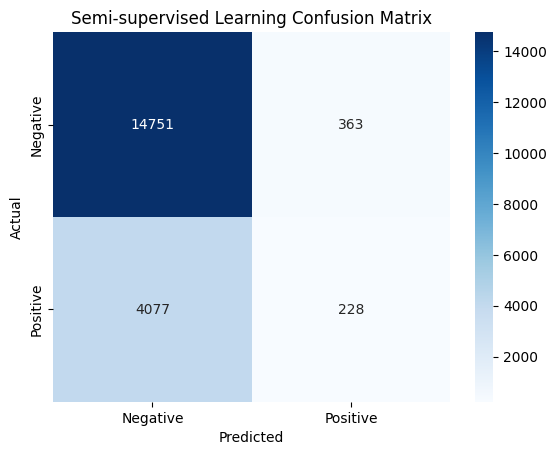

True Positives (TP): 228
True Negatives (TN): 14751
Semi-supervised Learning Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.87     15114
           1       0.39      0.05      0.09      4305

    accuracy                           0.77     19419
   macro avg       0.58      0.51      0.48     19419
weighted avg       0.70      0.77      0.70     19419

CPU times: total: 17.7 s
Wall time: 14.4 s


In [131]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.semi_supervised import LabelPropagation

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1).loc[0:10000]

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into labeled and unlabeled instances
X_labeled, X_unlabeled, y_labeled, _ = train_test_split(X, Y, test_size=0.8, random_state=42, stratify=Y)

# Create the semi-supervised learning model
label_propagation = LabelPropagation()

# Concatenate labeled and unlabeled instances
X_combined = pd.concat([X_labeled, X_unlabeled])
y_combined = pd.concat([y_labeled, pd.Series(np.zeros(len(X_unlabeled)))])  # Initialize labels for unlabeled instances

# Train the semi-supervised learning model
label_propagation.fit(X_combined, y_combined)

# Make predictions on the test set
y_pred = label_propagation.predict(X_test)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Semi-supervised Learning Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print("Semi-supervised Learning Classification Report:")
print(classification_report(y_test, y_pred))


# Novelty Detection

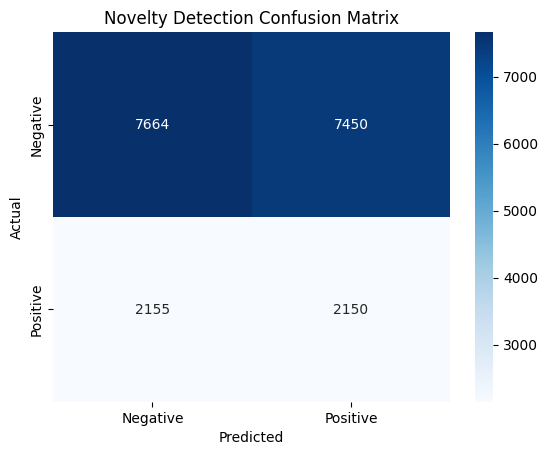

Novelty Detection Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.51      0.61     15114
           1       0.22      0.50      0.31      4305

    accuracy                           0.51     19419
   macro avg       0.50      0.50      0.46     19419
weighted avg       0.66      0.51      0.55     19419

CPU times: total: 6min 25s
Wall time: 6min 25s


In [18]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the One-Class SVM model
one_class_svm = OneClassSVM(gamma='scale')

# Fit the One-Class SVM model on the training data (considered as the majority class)
one_class_svm.fit(X_train[y_train == 0])

# Make predictions on the test set
y_pred = one_class_svm.predict(X_test)

# Convert predictions: 1 for normal instances (majority class) and -1 for novel instances (positive class)
y_pred[y_pred == 1] = 0  # Convert normal instances to 0 (negative class)
y_pred[y_pred == -1] = 1  # Convert novel instances to 1 (positive class)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Novelty Detection Confusion Matrix')
plt.show()

# Print the classification report
print("Novelty Detection Classification Report:")
print(classification_report(y_test, y_pred))


# Outlier Detection

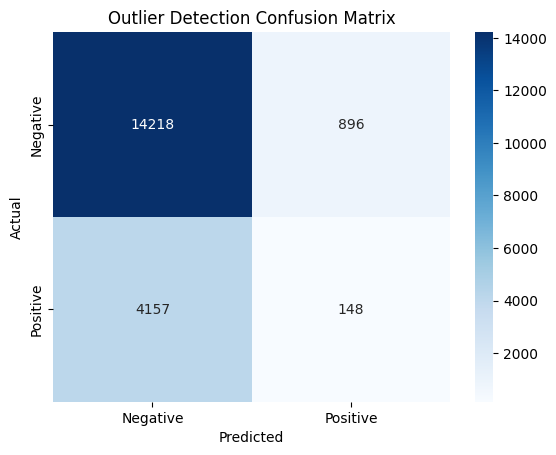

True Positives (TP): 148
True Negatives (TN): 14218
Outlier Detection Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85     15114
           1       0.14      0.03      0.06      4305

    accuracy                           0.74     19419
   macro avg       0.46      0.49      0.45     19419
weighted avg       0.63      0.74      0.67     19419

CPU times: total: 719 ms
Wall time: 710 ms


In [132]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the Isolation Forest model
isolation_forest = IsolationForest(contamination='auto', random_state=42)

# Fit the Isolation Forest model on the training data
isolation_forest.fit(X_train)

# Make predictions on the test set
y_pred = isolation_forest.predict(X_test)

# Convert predictions: 1 for normal instances (majority class) and -1 for outlier instances (positive class)
y_pred[y_pred == 1] = 0  # Convert normal instances to 0 (negative class)
y_pred[y_pred == -1] = 1  # Convert outlier instances to 1 (positive class)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Outlier Detection Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print("Outlier Detection Classification Report:")
print(classification_report(y_test, y_pred))


# Support Vector Machines (SVM)

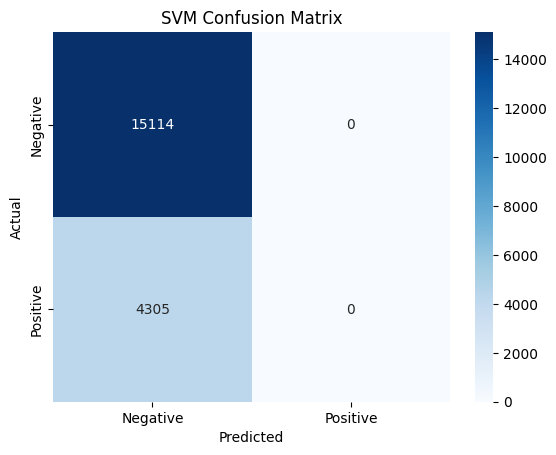

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     15114
           1       0.00      0.00      0.00      4305

    accuracy                           0.78     19419
   macro avg       0.39      0.50      0.44     19419
weighted avg       0.61      0.78      0.68     19419

CPU times: total: 4min 35s
Wall time: 4min 36s


D:\Users\ivan\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\ivan\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\ivan\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)  # You can try different kernels, such as 'linear', 'poly', 'sigmoid', etc.

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Print the classification report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))


# Gradient Boosting Machines (GBM) 

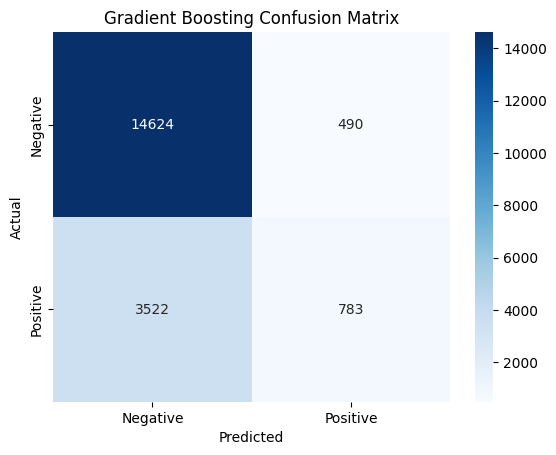

True Positives (TP): 783
True Negatives (TN): 14624
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     15114
           1       0.62      0.18      0.28      4305

    accuracy                           0.79     19419
   macro avg       0.71      0.57      0.58     19419
weighted avg       0.76      0.79      0.75     19419

CPU times: total: 9.02 s
Wall time: 9.04 s


In [133]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the classifier
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the classifier
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred))


# Multi-Layer Perceptrons (MLPs)

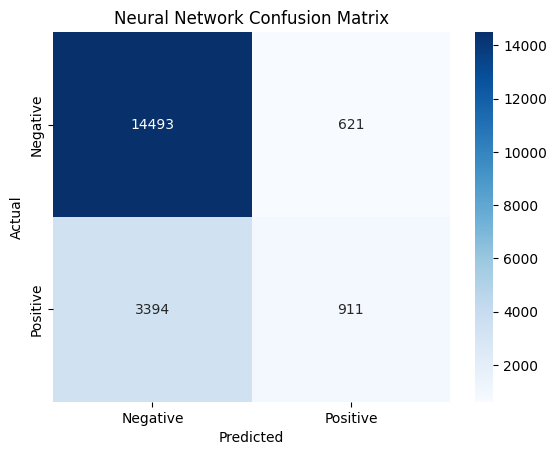

True Positives (TP): 911
True Negatives (TN): 14493
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     15114
           1       0.59      0.21      0.31      4305

    accuracy                           0.79     19419
   macro avg       0.70      0.59      0.60     19419
weighted avg       0.76      0.79      0.75     19419

CPU times: total: 2min 45s
Wall time: 1min 43s


In [134]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report


# Load the dataset
dataset = pd.read_csv('data_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the MLP classifier
mlp_classifier = MLPClassifier(random_state=42)

# Train the classifier
mlp_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp_classifier.predict(X_test)

# Evaluate the classifier
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred))


# Naive Bayes

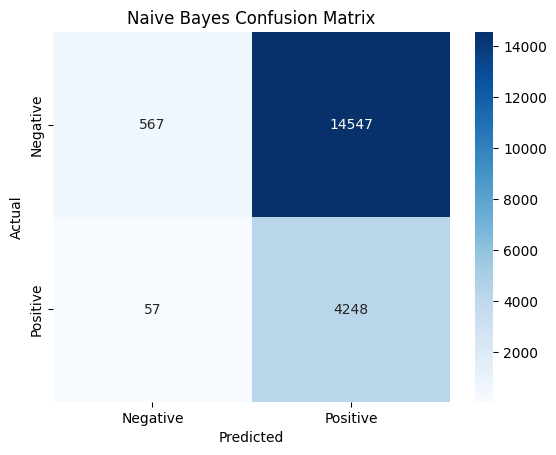

True Positives (TP): 4248
True Negatives (TN): 567
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.04      0.07     15114
           1       0.23      0.99      0.37      4305

    accuracy                           0.25     19419
   macro avg       0.57      0.51      0.22     19419
weighted avg       0.76      0.25      0.14     19419

CPU times: total: 484 ms
Wall time: 503 ms


In [135]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred))


# GaussianProcessClassifier

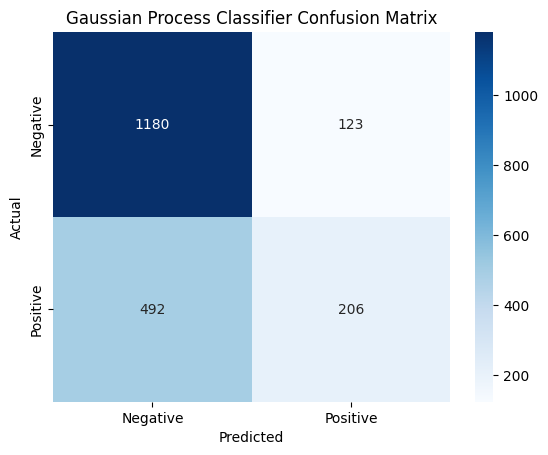

Gaussian Process Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.91      0.79      1303
           1       0.63      0.30      0.40       698

    accuracy                           0.69      2001
   macro avg       0.67      0.60      0.60      2001
weighted avg       0.68      0.69      0.66      2001

CPU times: total: 46min 23s
Wall time: 13min 3s


In [72]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1).loc[0:10000]

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the Gaussian Process classifier
kernel = 1.0 * RBF(1.0)  # Adjust the kernel as needed
gpc_classifier = GaussianProcessClassifier(kernel=kernel, random_state=42)

# Train the classifier
gpc_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gpc_classifier.predict(X_test)

# Evaluate the classifier
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gaussian Process Classifier Confusion Matrix')
plt.show()

# Print the classification report
print("Gaussian Process Classifier Classification Report:")
print(classification_report(y_test, y_pred))


# Linear Discriminant Analysis

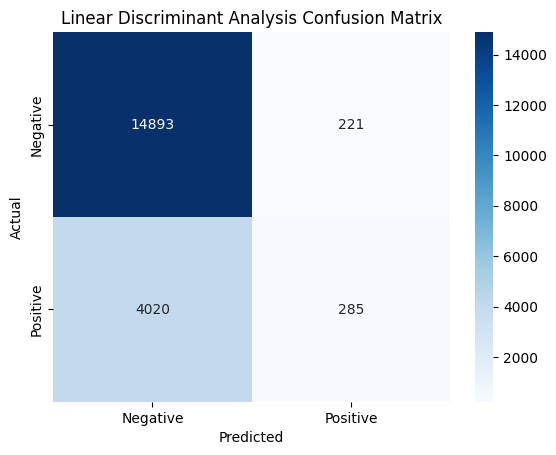

True Positives (TP): 285
True Negatives (TN): 14893
Linear Discriminant Analysis Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     15114
           1       0.56      0.07      0.12      4305

    accuracy                           0.78     19419
   macro avg       0.68      0.53      0.50     19419
weighted avg       0.74      0.78      0.71     19419

CPU times: total: 1.17 s
Wall time: 712 ms


In [136]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the Linear Discriminant Analysis classifier
lda_classifier = LinearDiscriminantAnalysis()

# Train the classifier
lda_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lda_classifier.predict(X_test)

# Evaluate the classifier
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Linear Discriminant Analysis Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print("Linear Discriminant Analysis Classification Report:")
print(classification_report(y_test, y_pred))


# Quadratic Discriminant Analysis

D:\Users\ivan\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


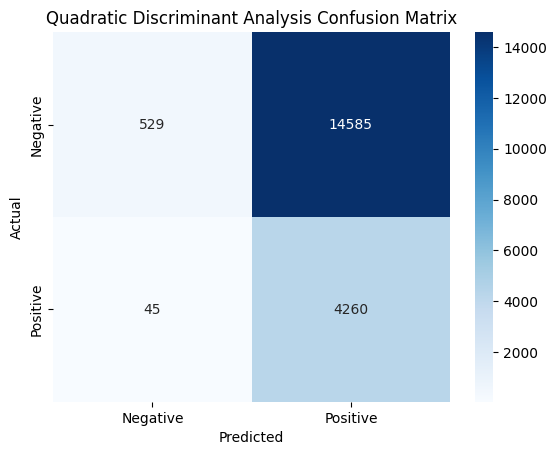

True Positives (TP): 4260
True Negatives (TN): 529
Quadratic Discriminant Analysis Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.04      0.07     15114
           1       0.23      0.99      0.37      4305

    accuracy                           0.25     19419
   macro avg       0.57      0.51      0.22     19419
weighted avg       0.77      0.25      0.13     19419

CPU times: total: 859 ms
Wall time: 575 ms


In [137]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, Y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the Quadratic Discriminant Analysis classifier
qda_classifier = QuadraticDiscriminantAnalysis()

# Train the classifier
qda_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = qda_classifier.predict(X_test)

# Evaluate the classifier
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Quadratic Discriminant Analysis Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print("Quadratic Discriminant Analysis Classification Report:")
print(classification_report(y_test, y_pred))


# Deep Neural Networks (DNN)

Epoch 1/10
2428/2428 [==============================] - 3s 1ms/step - loss: 0.4719 - accuracy: 0.7938
Epoch 2/10
2428/2428 [==============================] - 3s 1ms/step - loss: 0.4623 - accuracy: 0.7968
Epoch 3/10
2428/2428 [==============================] - 3s 1ms/step - loss: 0.4597 - accuracy: 0.7979
Epoch 4/10
2428/2428 [==============================] - 3s 1ms/step - loss: 0.4588 - accuracy: 0.7985
Epoch 5/10
2428/2428 [==============================] - 3s 1ms/step - loss: 0.4575 - accuracy: 0.7990
Epoch 6/10
2428/2428 [==============================] - 3s 1ms/step - loss: 0.4570 - accuracy: 0.7994
Epoch 7/10
2428/2428 [==============================] - 3s 1ms/step - loss: 0.4562 - accuracy: 0.7995
Epoch 8/10
2428/2428 [==============================] - 3s 1ms/step - loss: 0.4552 - accuracy: 0.7999
Epoch 9/10
2428/2428 [==============================] - 3s 1ms/step - loss: 0.4545 - accuracy: 0.7996
Epoch 10/10
607/607 [==============================] - 1s 925us/step


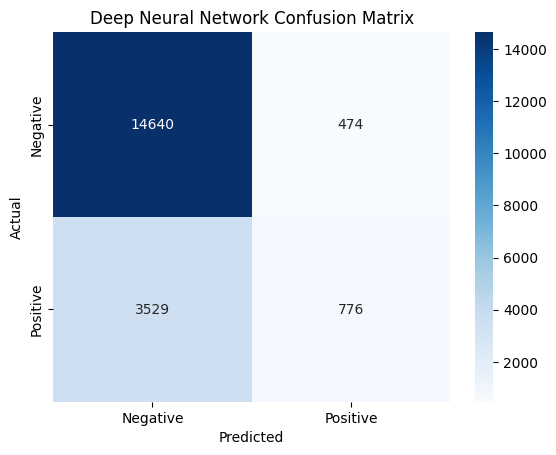

True Positives (TP): 776
True Negatives (TN): 14640
Deep Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88     15114
           1       0.62      0.18      0.28      4305

    accuracy                           0.79     19419
   macro avg       0.71      0.57      0.58     19419
weighted avg       0.76      0.79      0.75     19419

CPU times: total: 55.3 s
Wall time: 30.7 s


In [138]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
dataset = pd.read_csv('data_not_processed.csv')   # Replace 'your_dataset.csv' with the actual filename/path
dataset = dataset.drop('Unnamed: 0', axis=1)

# Preprocess the dataset (if needed)
# Split the dataset into features (X) and target (y)
X, y = dataset.drop('P_NED_ADR', axis=1), dataset['P_NED_ADR']

# Convert continuous target to binary classes
threshold = 0.5  # Adjust the threshold as needed
y_binary = np.where(y >= threshold, 1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Deep Neural Network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)

# Make predictions on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba >= 0.5).astype(int)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
labels = ['Negative', 'Positive']
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Deep Neural Network Confusion Matrix')
plt.show()

# Print the True Positive (TP) and True Negative (TN) metrics
tn, fp, fn, tp = confusion_mat.ravel()
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)

# Print the classification report
print("Deep Neural Network Classification Report:")
print(classification_report(y_test, y_pred))
